In [6]:
import numpy as np
from skimage import measure
from skimage.segmentation import find_boundaries
from skimage.morphology import opening,closing
from skimage.io import imread
from matplotlib import pyplot as plt
import os
from os import listdir
import pandas as pd
from scipy.stats import kde
import seaborn as sns
import copy
from math import exp,log
import pickle
import scipy.ndimage as ndimage
import scipy.interpolate.fitpack as fitpack
from sklearn import manifold,decomposition,random_projection,cluster,metrics,preprocessing,mixture,model_selection
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import scipy.io as sio

from mpl_toolkits.mplot3d import Axes3D

from nolitsa.dimension import afn
from nolitsa.utils import reconstruct
import glob

from scipy import signal
from scipy.signal import medfilt
from scipy.stats import gaussian_kde

from statsmodels.tsa.ar_model import AR

from tslearn.utils import to_time_series,to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,KShape,GlobalAlignmentKernelKMeans,silhouette_score
from tslearn.metrics import dtw_path,dtw_subsequence_path,cdist_gak,cdist_dtw
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter,euclidean_barycenter
import sparse
from reactive_traj_classify import find_reaction_start_end,ar1_tipping_time,cross_corr_delay

In [7]:
main_path='/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/'

with open (main_path+'morph_pc_scaler','rb') as fp:
    morph_pc_scaler=pickle.load(fp)

with open (main_path+'vim_pc_scaler','rb') as fp:
    vim_pc_scaler=pickle.load(fp)
    
with open (main_path+'label_spread_4d','rb') as fp:
    ls=pickle.load(fp)
    
# with open (main_path+'scale_gmm','rb') as fp:
#     gmm=pickle.load(fp)
result_path=main_path+'result/'
    
sct_path=main_path+'single_cell_traj/'
#sct_list=sorted(listdir(sct_path))
sct_list=sorted(glob.glob(sct_path+'*long_traj'))

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_11_long_traj
(4, 258)


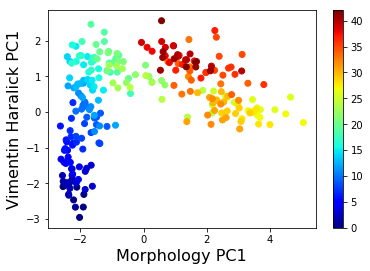

[158, 68, 141, 153]
('vim first', 65)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_12_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_13_long_traj
(8, 284)


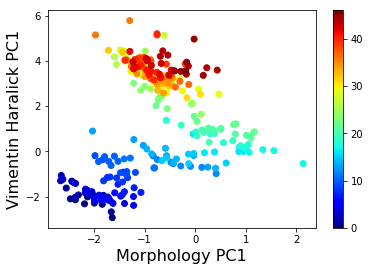

[104, 151, 176, 70]
('morph first', -42)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_15_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_19_long_traj
(2, 259)


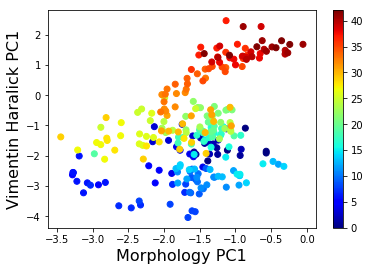

[69, 133, 68, 79]
('vim first', 114)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_20_long_traj
(0, 236)


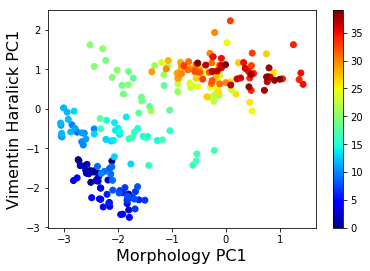

[101, 78, 127, 78]
('vim first', 5)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_25_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy10_7_long_traj
(0, 284)


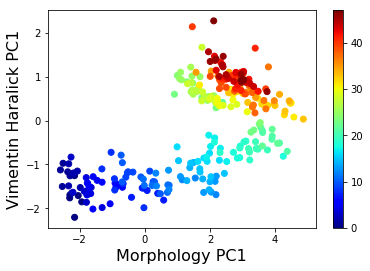

[77, 159, 105, 84]
('morph first', -7)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_11_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_12_long_traj
(0, 285)


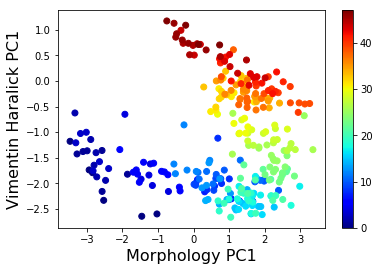

[74, 153, 190, 84]
('morph first', -27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_13_long_traj
(2, 277)


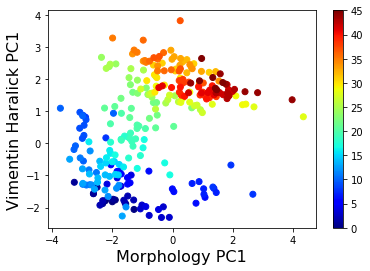

[101, 153, 153, 76]
('vim first', 41)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_15_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_1_long_traj
(0, 184)


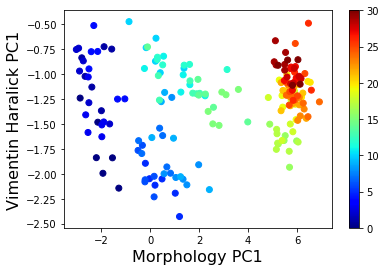

[55, 76, 134, 126]
('morph first', -22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_25_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_35_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy11_9_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy12_11_long_traj
(0, 284)


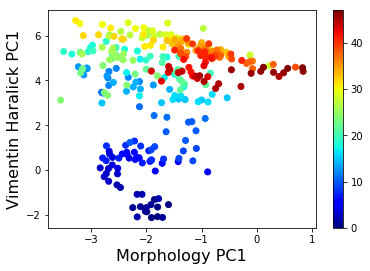

[82, 73, 117, 117]
('vim first', 95)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy12_17_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy12_20_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy12_5_long_traj
(0, 278)


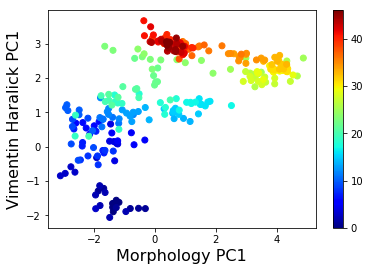

[105, 74, 130, 119]
('vim first', 1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_13_long_traj
(0, 202)


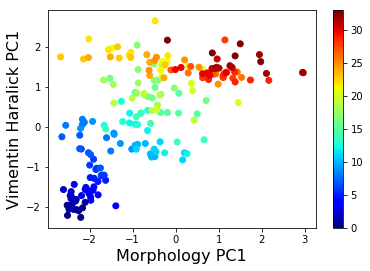

[70, 54, 108, 90]
('morph first', -3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_15_long_traj
(0, 274)


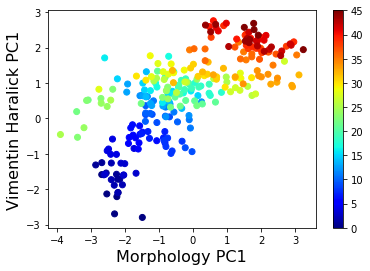

[69, 74, 101, 69]
('morph first', -2)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_20_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_21_long_traj
(0, 284)


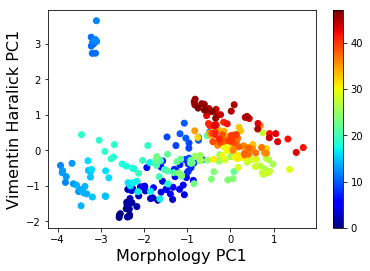

[98, 75, 84, 77]
('morph first', -12)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_24_long_traj
(0, 267)


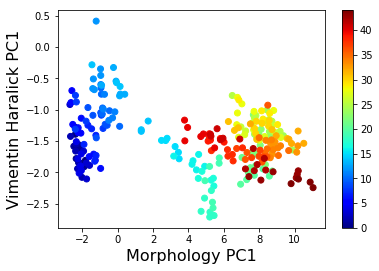

[127, 175, 79, 115]
('vim first', 61)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_28_long_traj
(7, 211)


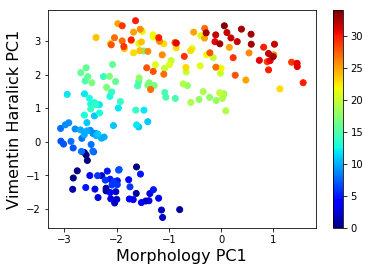

[126, 98, 98, 52]
('vim first', 1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_30_long_traj
(0, 283)


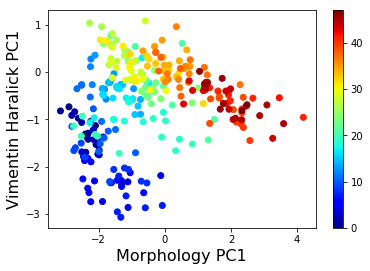

[210, 86, 74, 73]
('vim first', 47)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_38_long_traj
(1, 240)


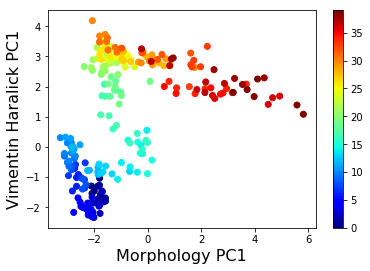

[88, 68, 138, 132]
('vim first', 36)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_3_long_traj
(0, 252)


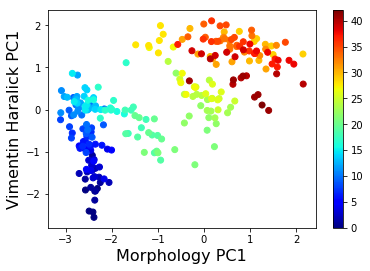

[131, 173, 181, 128]
('vim first', 1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_46_long_traj
(0, 253)


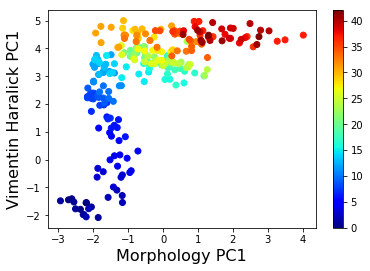

[106, 66, 65, 101]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_5_long_traj
(0, 274)


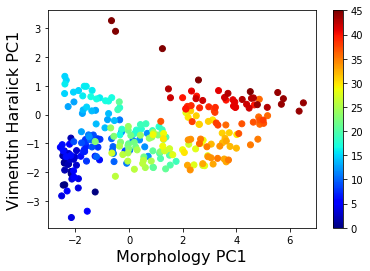

[139, 102, 161, 139]
('morph first', -6)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy13_6_long_traj
(0, 274)


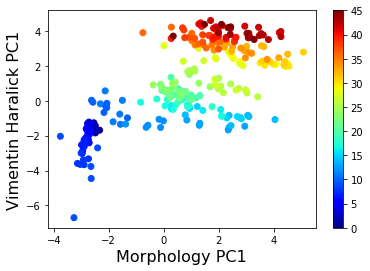

[80, 196, 194, 92]
('morph first', -4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_12_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_13_long_traj
(0, 282)


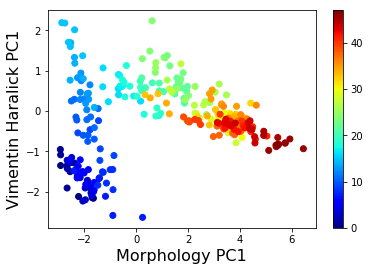

[138, 91, 200, 186]
('vim first', 61)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_14_long_traj
(0, 283)


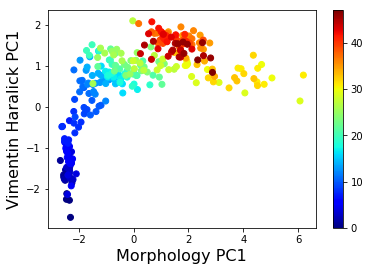

[97, 79, 157, 150]
('vim first', 1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_17_long_traj
(0, 243)


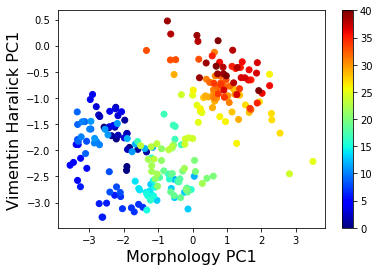

[82, 95, 80, 107]
('morph first', -15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_22_long_traj
(0, 282)


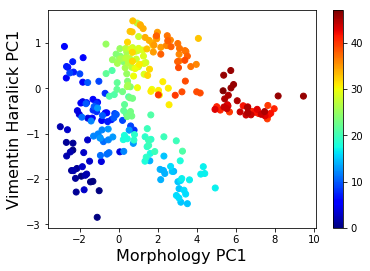

[106, 152, 152, 127]
('vim first', 45)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_24_long_traj
(0, 283)


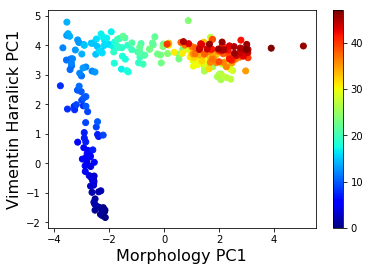

[151, 74, 87, 163]
('vim first', 48)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_3_long_traj
(0, 273)


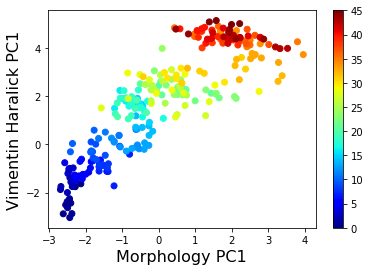

[87, 125, 169, 139]
('morph first', -3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_7_long_traj
(0, 258)


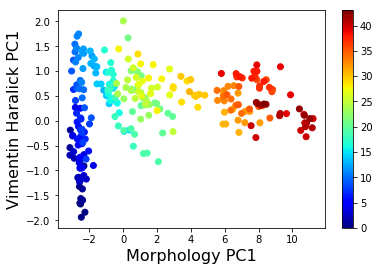

[92, 79, 79, 119]
('vim first', 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy14_9_long_traj
(0, 283)


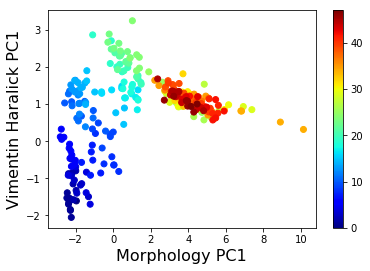

[167, 77, 120, 196]
('vim first', 35)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_11_long_traj
(0, 265)


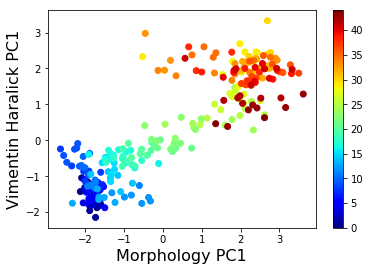

[167, 165, 97, 78]
('morph first', -2)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_13_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_21_long_traj
(0, 255)


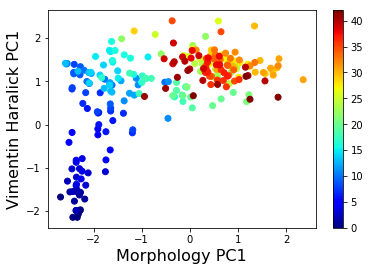

[140, 66, 68, 140]
('vim first', 4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_22_long_traj
(0, 218)


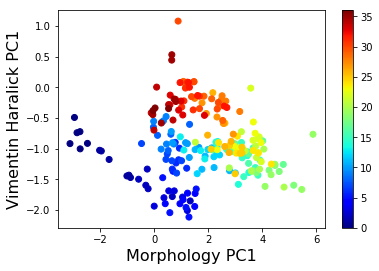

[99, 56, 57, 117]
('morph first', -105)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_2_long_traj
(2, 282)


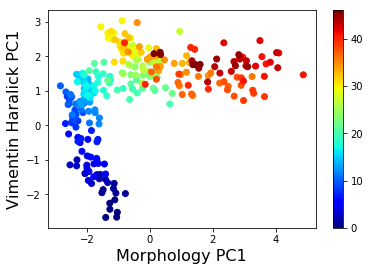

[125, 76, 178, 125]
('vim first', 63)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_5_long_traj
(0, 192)


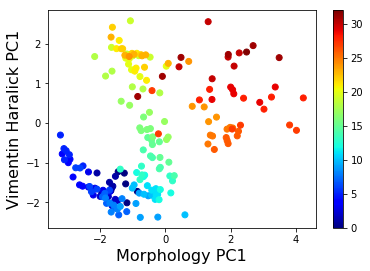

[62, 115, 113, 62]
('vim first', 38)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_6_long_traj
(0, 197)


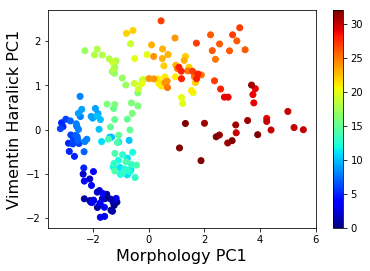

[78, 110, 113, 75]
('vim first', 20)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_7_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy15_9_long_traj
(0, 266)


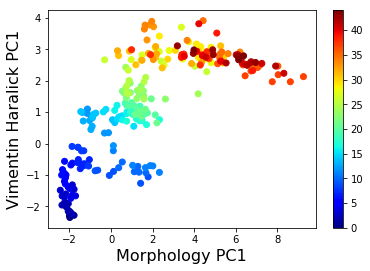

[67, 166, 116, 95]
('vim first', 1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy16_10_long_traj
(1, 280)


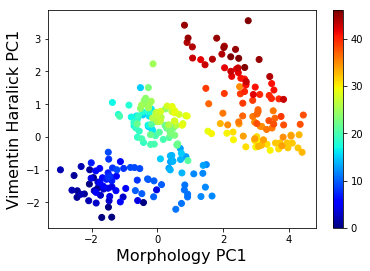

[201, 113, 150, 139]
('morph first', -24)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy16_11_long_traj
(2, 190)


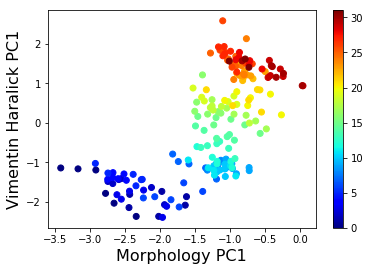

[58, 99, 62, 64]
('morph first', -6)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy16_22_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy16_3_long_traj
(0, 182)


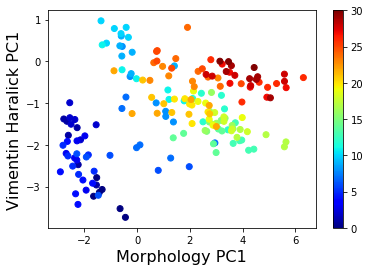

[101, 65, 65, 94]
('vim first', 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy16_4_long_traj
(0, 255)


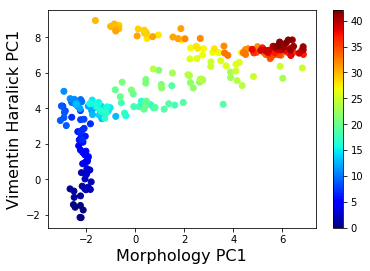

[116, 180, 175, 114]
('morph first', -2)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_12_long_traj
(5, 283)


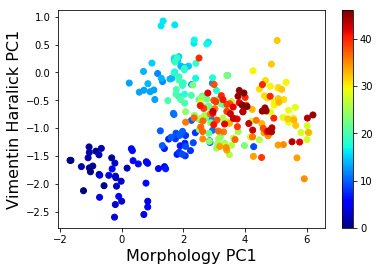

[71, 102, 156, 137]
('morph first', -4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_14_long_traj
(0, 284)


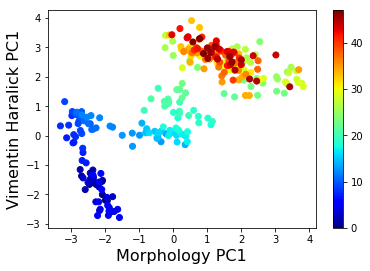

[86, 148, 155, 116]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_15_long_traj
(4, 208)


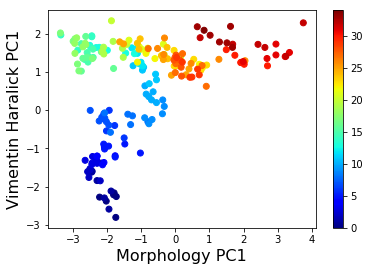

[89, 89, 101, 146]
('vim first', 50)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_17_long_traj
(0, 205)


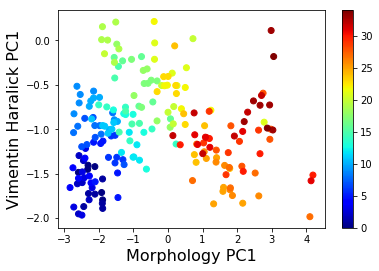

[89, 119, 115, 94]
('vim first', 59)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_18_long_traj
(7, 286)


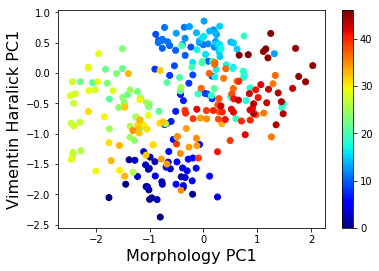

[174, 82, 131, 109]
('morph first', -3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_19_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_24_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_25_long_traj
(0, 206)


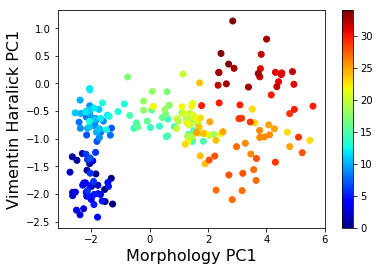

[94, 57, 150, 99]
('vim first', 49)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_3_long_traj
(0, 267)


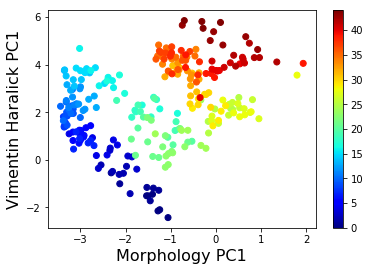

[107, 74, 130, 148]
('vim first', 88)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_4_long_traj
(0, 285)


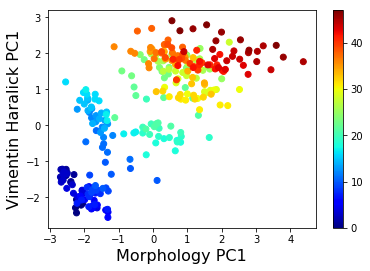

[115, 85, 149, 132]
('morph first', -3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy17_8_long_traj
(0, 281)


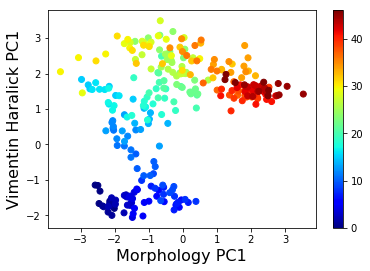

[71, 93, 100, 160]
('vim first', 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy18_10_long_traj
(0, 286)


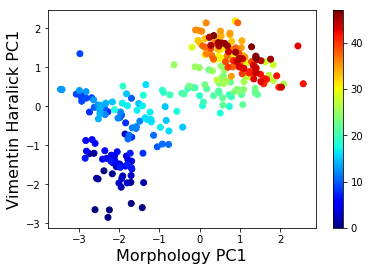

[141, 190, 169, 114]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy18_13_long_traj
(0, 284)


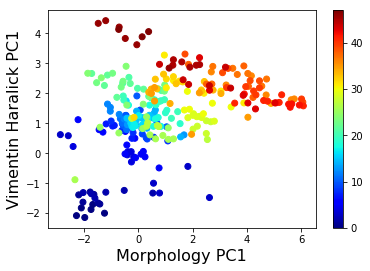

[197, 73, 148, 98]
('morph first', -11)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy18_4_long_traj
(2, 206)


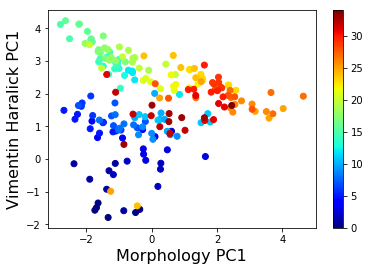

[141, 95, 74, 141]
('vim first', 37)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy18_9_long_traj
(0, 281)


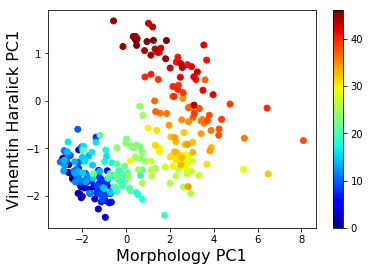

[115, 147, 74, 128]
('morph first', -27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_10_long_traj
(7, 268)


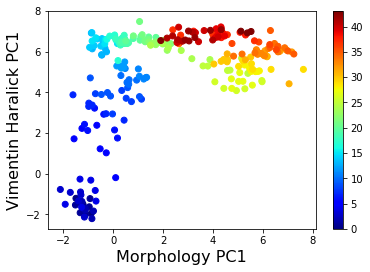

[157, 72, 158, 159]
('morph first', -2)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_13_long_traj
(0, 281)


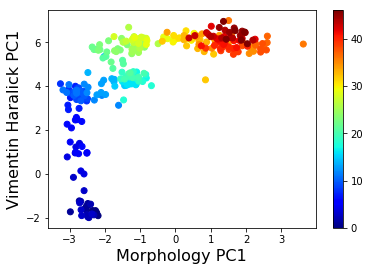

[111, 72, 73, 114]
('vim first', 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_14_long_traj
(0, 283)


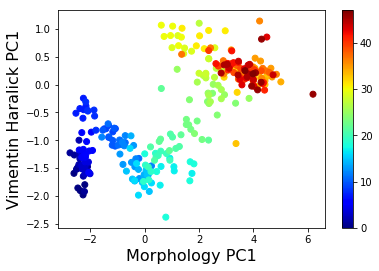

[76, 186, 122, 76]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_17_long_traj
(1, 284)


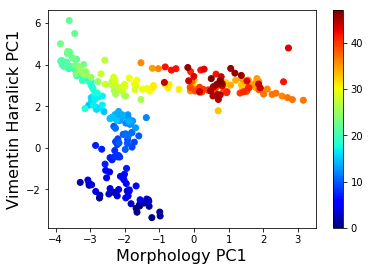

[200, 87, 87, 128]
('vim first', 126)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_18_long_traj
(0, 282)


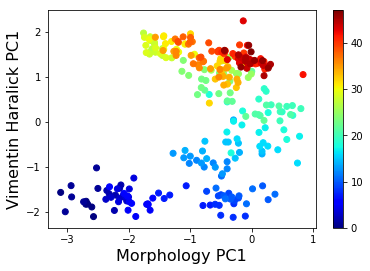

[71, 88, 88, 181]
('morph first', -3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_20_long_traj
(0, 232)


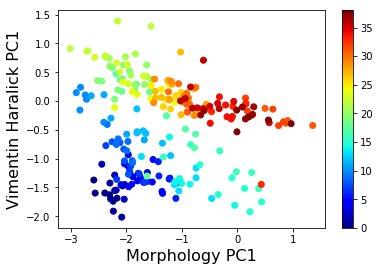

[91, 134, 134, 66]
('vim first', 26)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_23_long_traj
(0, 283)


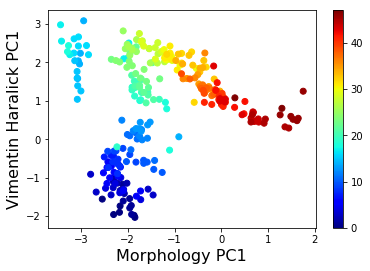

[210, 87, 95, 210]
('vim first', 41)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_24_long_traj
(5, 285)


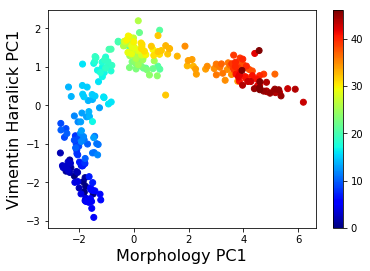

[206, 94, 125, 207]
('vim first', 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_42_long_traj
(0, 262)


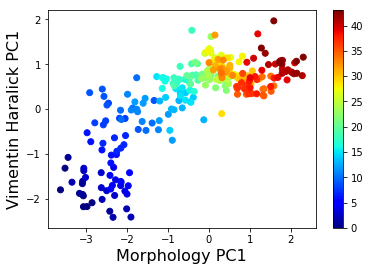

[93, 85, 114, 107]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_7_long_traj
(0, 286)


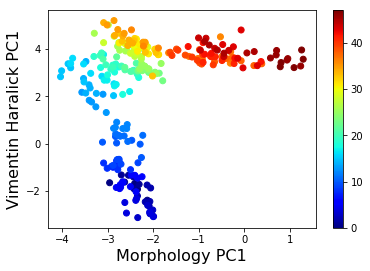

[156, 88, 72, 98]
('vim first', 98)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy19_9_long_traj
(4, 190)


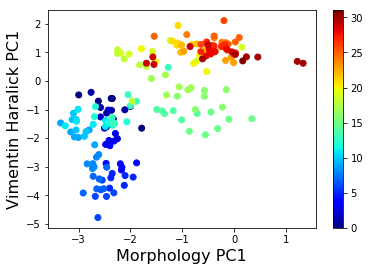

[94, 73, 48, 100]
('vim first', 5)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy1_1_long_traj
(0, 282)


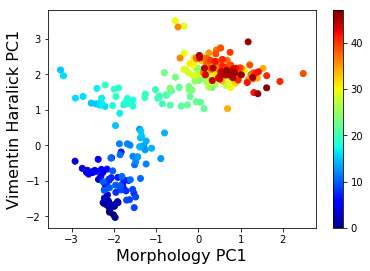

[162, 118, 119, 96]
('vim first', 6)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy1_2_long_traj
(0, 282)


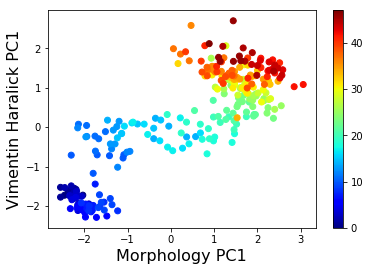

[126, 92, 175, 145]
('morph first', -4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy1_5_long_traj
(0, 282)


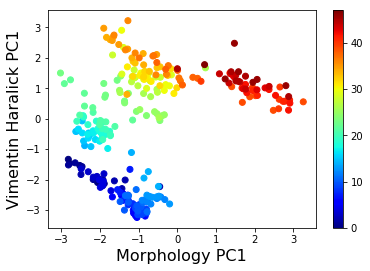

[115, 96, 136, 91]
('vim first', 32)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_14_long_traj
(0, 254)


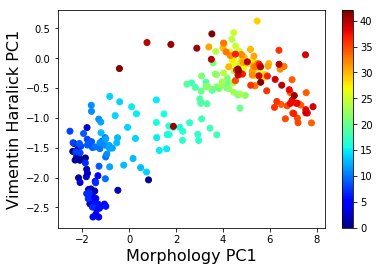

[110, 153, 153, 106]
('morph first', -8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_15_long_traj
(0, 229)


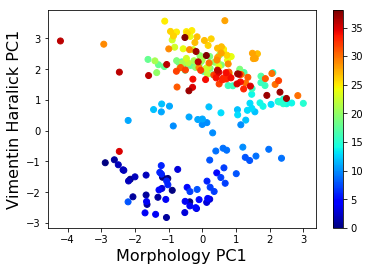

[135, 94, 134, 138]
('morph first', -37)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_16_long_traj
(0, 273)


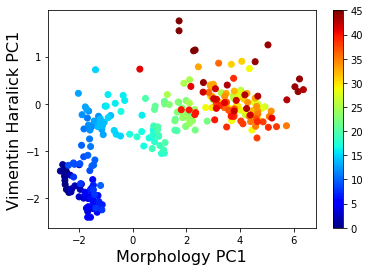

[137, 96, 165, 121]
('morph first', -5)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_18_long_traj
(0, 279)


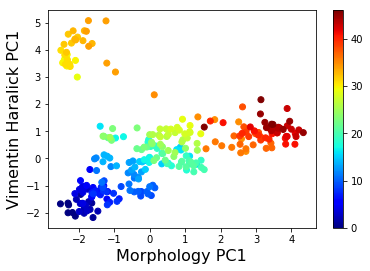

[74, 181, 181, 74]
('vim first', 31)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_1_long_traj
(0, 187)


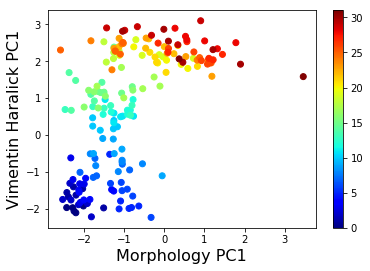

[54, 79, 83, 56]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_23_long_traj
(0, 281)


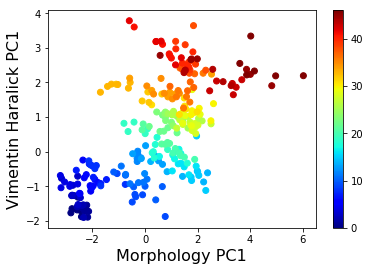

[88, 154, 117, 101]
('vim first', 0)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_25_long_traj
(0, 242)


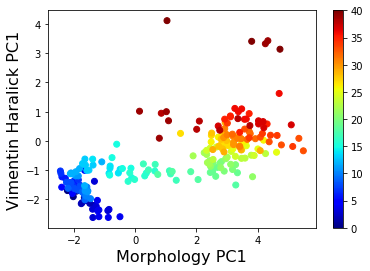

[113, 95, 80, 127]
('morph first', -16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_28_long_traj
(0, 212)


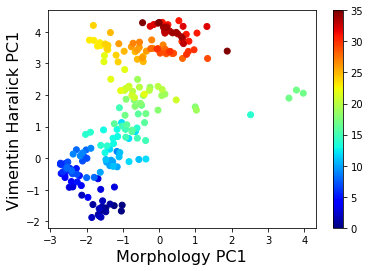

[74, 150, 151, 86]
('vim first', 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_30_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy20_32_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy2_10_long_traj
(0, 271)


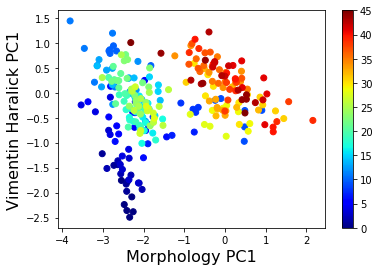

[182, 70, 70, 136]
('vim first', 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy2_11_long_traj
(0, 181)


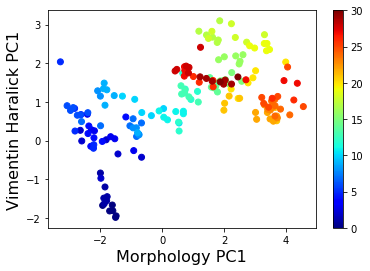

[96, 133, 116, 112]
('vim first', 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy2_12_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy2_19_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy2_20_long_traj
(0, 196)


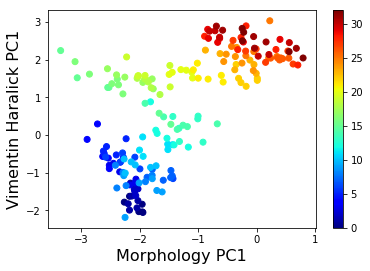

[141, 95, 104, 95]
('vim first', 4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_12_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_13_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_16_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_17_long_traj
(0, 280)


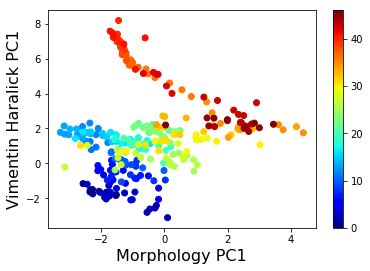

[145, 74, 96, 160]
('vim first', 28)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_19_long_traj
(0, 270)


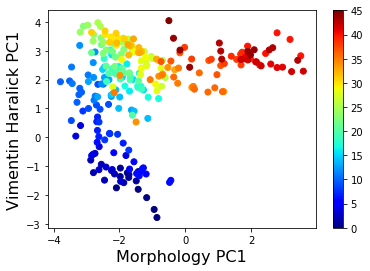

[69, 74, 74, 69]
('vim first', 104)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_1_long_traj
(0, 283)


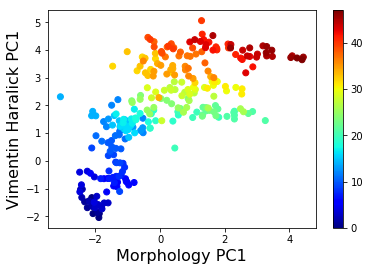

[130, 76, 167, 143]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_27_long_traj
(0, 233)


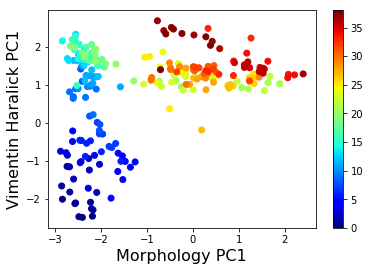

[131, 80, 80, 146]
('vim first', 57)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_29_long_traj
(0, 256)


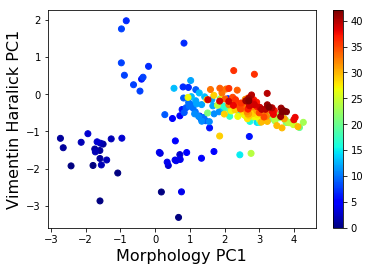

[108, 70, 75, 102]
('vim first', 7)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_2_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_4_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_5_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_6_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_7_long_traj
(0, 220)


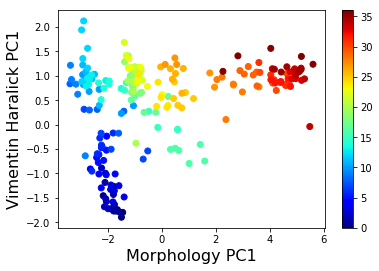

[123, 66, 141, 111]
('vim first', 40)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_8_long_traj
(0, 197)


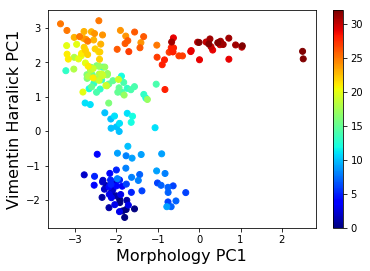

[50, 78, 91, 79]
('vim first', 85)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy3_9_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy4_11_long_traj
(6, 205)


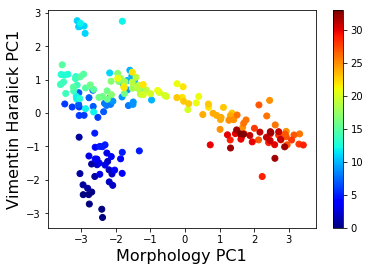

[127, 69, 73, 126]
('vim first', 81)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy4_15_long_traj
(0, 285)


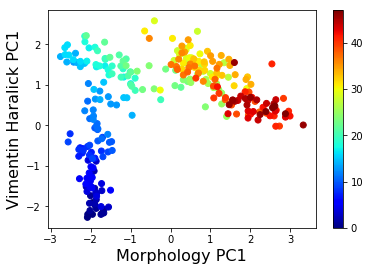

[165, 100, 100, 163]
('vim first', 56)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy4_25_long_traj
(0, 283)


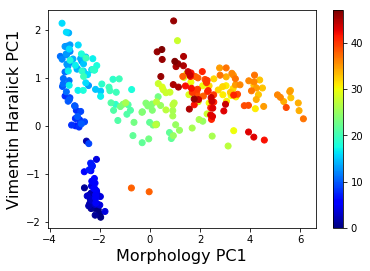

[155, 87, 87, 158]
('vim first', 84)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy4_4_long_traj
(0, 285)


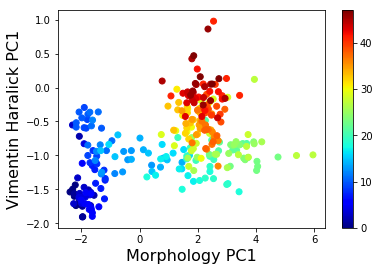

[88, 97, 191, 119]
('morph first', -3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy4_5_long_traj
(0, 224)


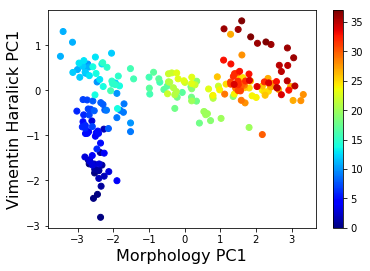

[119, 76, 70, 153]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy4_7_long_traj
(0, 283)


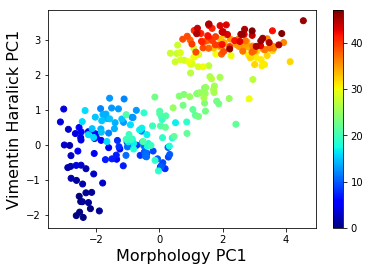

[73, 173, 98, 73]
('morph first', -2)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy4_8_long_traj
(7, 286)


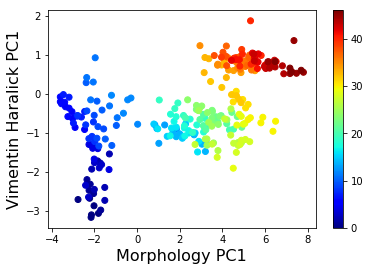

[83, 205, 170, 122]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy5_14_long_traj
(0, 281)


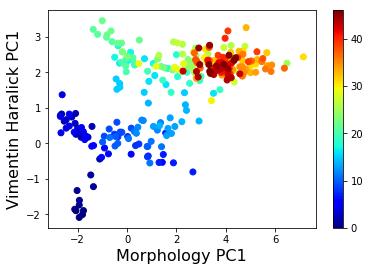

[87, 105, 133, 84]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy5_1_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy5_5_long_traj
(5, 283)


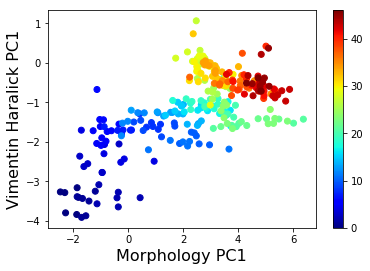

[71, 168, 74, 85]
('morph first', -2)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_11_long_traj
(0, 212)


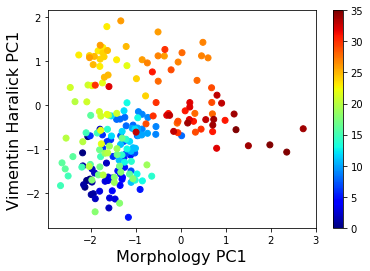

[54, 153, 146, 85]
('vim first', 27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_12_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_15_long_traj
(0, 275)


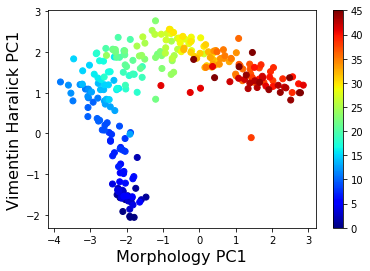

[79, 75, 78, 77]
('vim first', 62)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_17_long_traj
(0, 283)


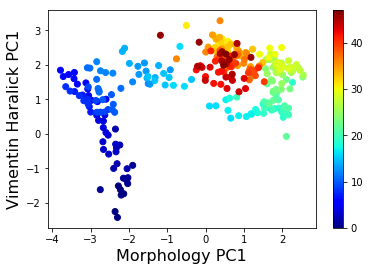

[104, 74, 211, 106]
('vim first', 29)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_19_long_traj
(0, 279)


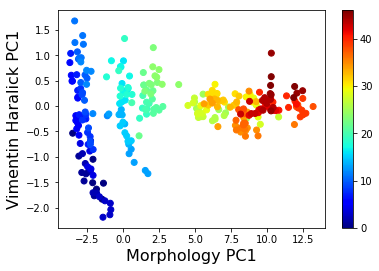

[155, 75, 71, 95]
('vim first', 86)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_26_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_32_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_3_long_traj
(6, 281)


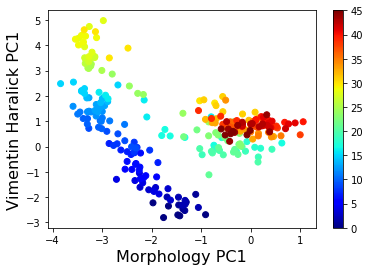

[204, 174, 174, 183]
('vim first', 47)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_4_long_traj
(0, 284)


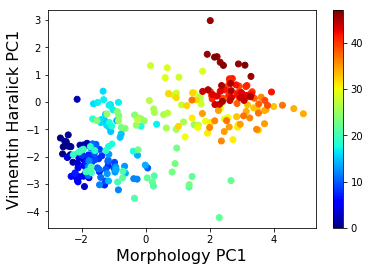

[209, 176, 197, 183]
('morph first', -10)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy6_9_long_traj
(2, 203)


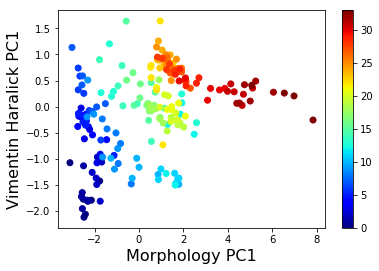

[79, 52, 133, 69]
('vim first', 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_10_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_11_long_traj
(0, 286)


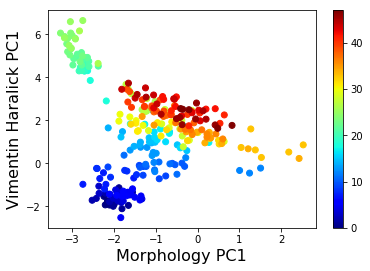

[199, 114, 129, 156]
('vim first', 50)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_14_long_traj
(1, 184)


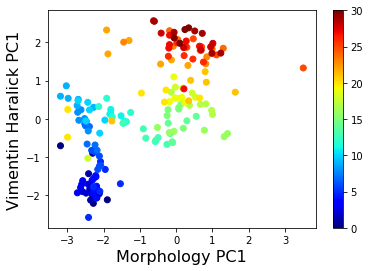

[90, 59, 88, 86]
('morph first', -5)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_18_long_traj
(0, 284)


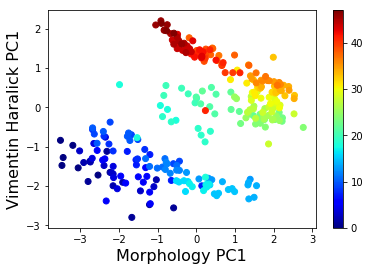

[171, 134, 153, 107]
('morph first', -58)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_19_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_1_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_20_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_21_long_traj
(8, 232)


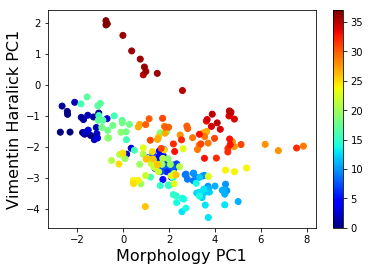

[100, 103, 92, 103]
('morph first', -105)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_22_long_traj
(0, 253)


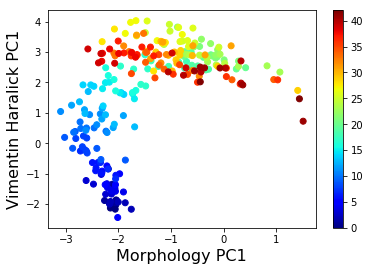

[142, 100, 157, 120]
('vim first', 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_24_long_traj
(0, 285)


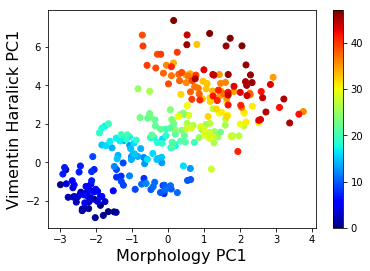

[82, 126, 201, 201]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_26_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_29_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_32_long_traj
(0, 224)


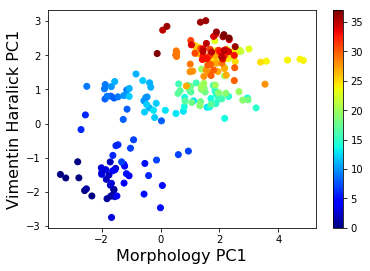

[107, 140, 162, 107]
('morph first', -4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy7_9_long_traj
(0, 279)


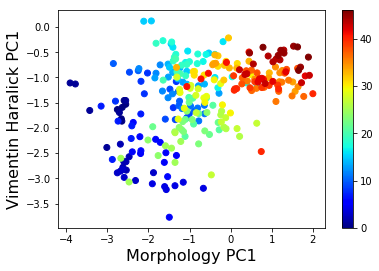

[71, 155, 75, 139]
('morph first', -13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy8_18_long_traj
(0, 215)


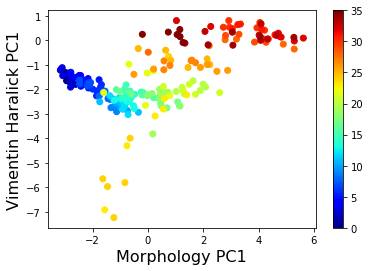

[67, 67, 113, 142]
('morph first', -4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy8_19_long_traj
(0, 259)


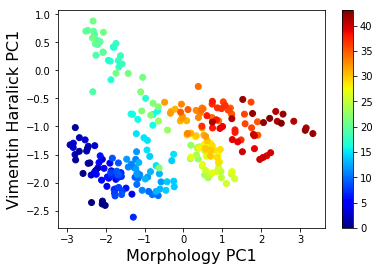

[160, 113, 127, 154]
('vim first', 32)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy8_20_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy8_27_long_traj
(2, 186)


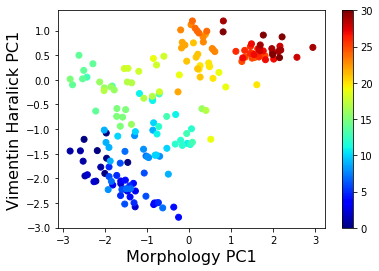

[101, 86, 86, 86]
('morph first', -4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_11_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_12_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_14_long_traj
(0, 283)


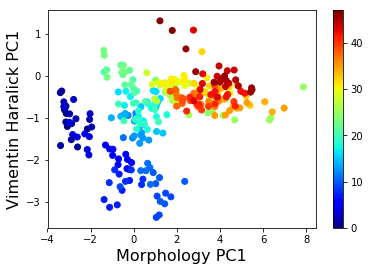

[156, 103, 144, 208]
('morph first', -73)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_19_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_23_long_traj
(7, 279)


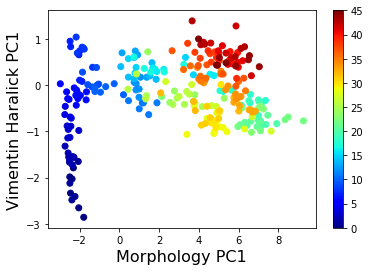

[69, 71, 72, 77]
('vim first', 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_26_long_traj
(0, 283)


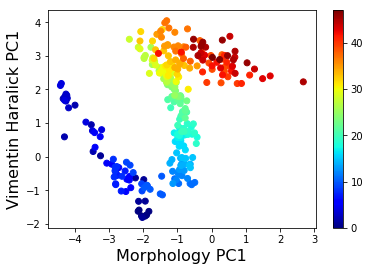

[82, 125, 96, 84]
('vim first', 47)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_2_long_traj
(0, 201)


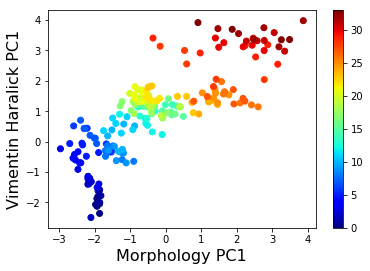

[92, 94, 94, 78]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_32_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_37_long_traj
(0, 251)


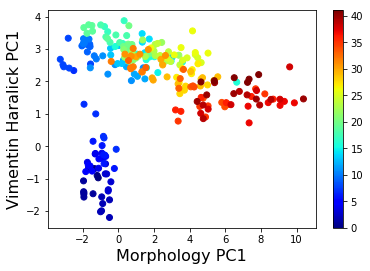

[81, 64, 184, 172]
('vim first', 42)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_40_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_4_long_traj
(0, 283)


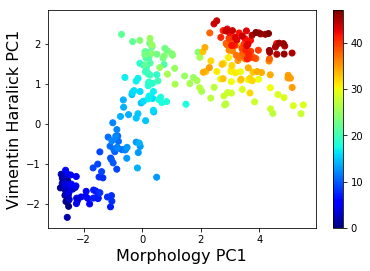

[79, 104, 138, 167]
('morph first', -3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_5_long_traj
(0, 276)


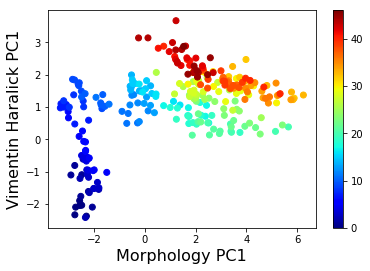

[105, 85, 76, 119]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/fluor_sct_xy9_8_long_traj
(3, 183)


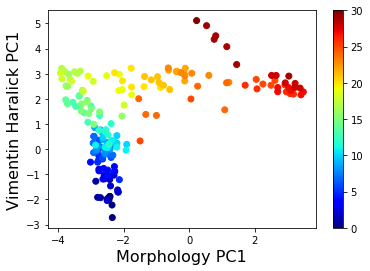

[122, 101, 108, 76]
('vim first', 35)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy10_30_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy10_32_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy11_27_long_traj
(0, 275)


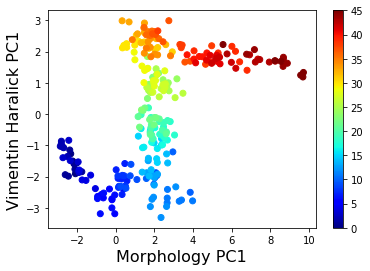

[74, 185, 185, 74]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy13_23_long_traj
(16, 187)


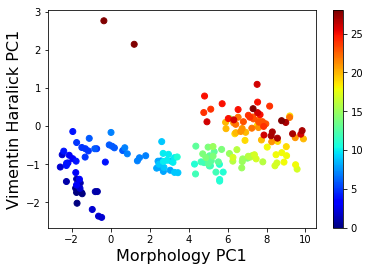

[57, 50, 105, 57]
('morph first', -4)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy13_31_long_traj
(0, 275)


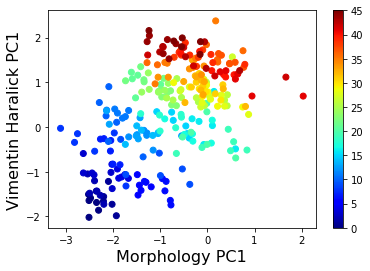

[107, 71, 81, 76]
('morph first', -14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy13_32_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy13_43_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy13_44_long_traj
(0, 237)


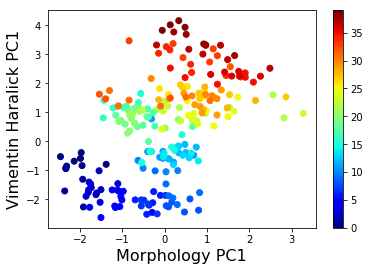

[62, 97, 96, 107]
('morph first', -16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy16_23_long_traj
(6, 206)


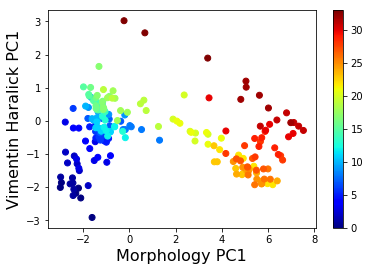

[121, 147, 94, 137]
('vim first', 75)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy17_11_long_traj
(10, 251)


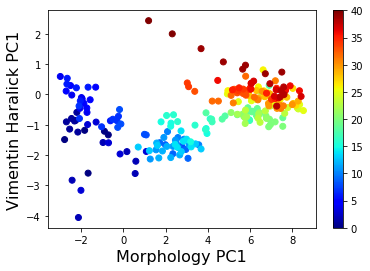

[80, 114, 99, 82]
('morph first', -8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy19_21_long_traj
(4, 217)


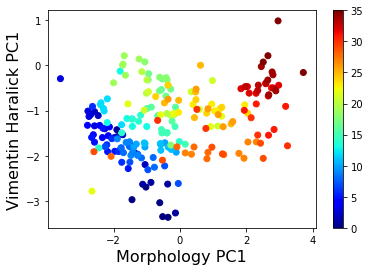

[66, 108, 55, 72]
('vim first', 48)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy19_27_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy19_28_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy1_13_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy1_7_long_traj
(0, 267)


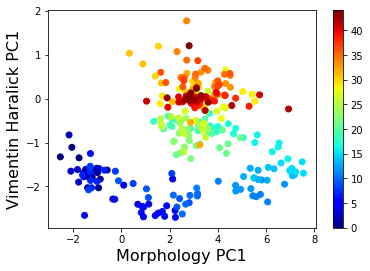

[100, 117, 68, 190]
('morph first', -89)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy20_6_long_traj
(25, 233)


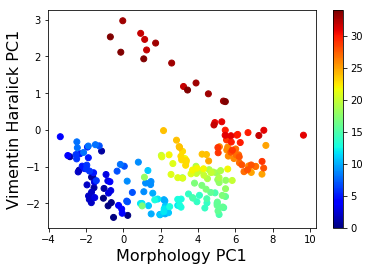

[95, 147, 53, 82]
('morph first', -17)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy2_24_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy2_25_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy2_29_long_traj
(0, 224)


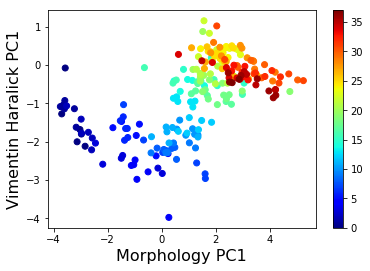

[59, 99, 104, 59]
('morph first', -7)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy4_36_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy4_40_long_traj
(7, 245)


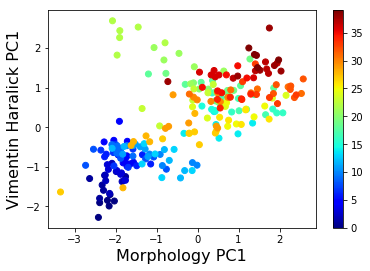

[98, 119, 137, 137]
('morph first', -2)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy4_41_long_traj
(0, 226)


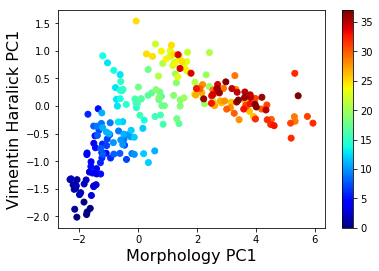

[59, 92, 152, 127]
('vim first', 5)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy4_42_long_traj
(0, 230)


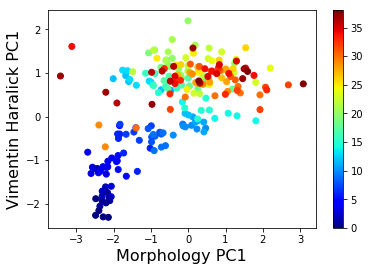

[64, 99, 135, 80]
('vim first', 1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy5_18_long_traj
(1, 242)


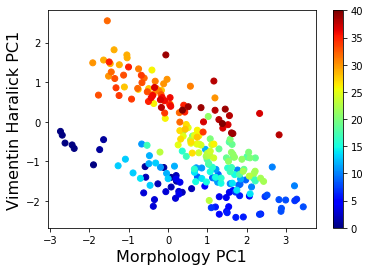

[64, 70, 178, 64]
('morph first', -121)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy5_19_long_traj
(2, 241)


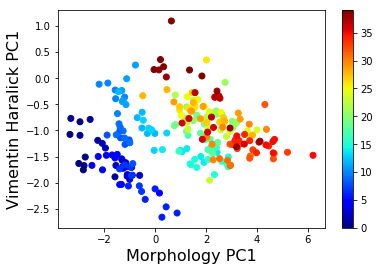

[110, 72, 68, 111]
('morph first', -34)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy6_25_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy7_33_long_traj
(0, 231)


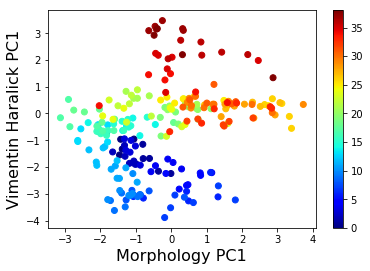

[126, 107, 62, 61]
('morph first', -59)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy7_35_long_traj
(0, 218)


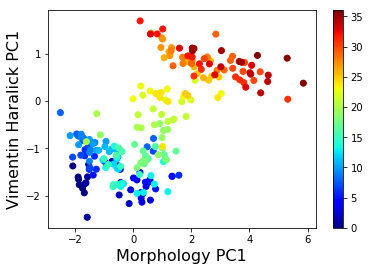

[108, 143, 98, 94]
('morph first', -1)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy7_37_long_traj
(0, 262)


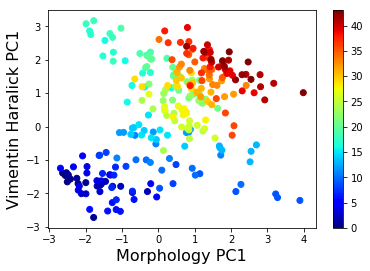

[83, 101, 101, 159]
('vim first', 3)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy8_35_long_traj
(0, 242)


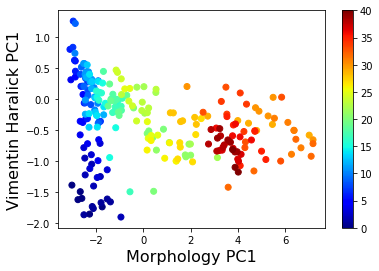

[179, 62, 63, 130]
('vim first', 90)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_without_bgcorr/single_cell_traj/sub_sct_xy8_3_long_traj
196


In [8]:
cross_corr_lag=[]
auto_corr_lag=[]
auto_corr_tip_point=[]

initial_vim=[]
mean_neighbor=[]
mean_nei_trans=[]
mean_nei_vim_tip=[]
mean_nei_morph_tip=[]

non_reactive_mean_neighbor=[]

trans_t=[]


all_reaction_traj_fd=[]
all_reaction_traj=[]
all_reaction_vim=[]
all_reaction_cord=[]
all_reaction_state=[]
all_reaction_proba=[]

count=0
for i in range(len(sct_list)):
    with open (sct_list[i], 'rb') as fp:
        sct = pickle.load(fp)
    if hasattr(sct,'traj_scale_cord') and hasattr(sct,'traj_vimentin_scale_haralick_pca_cord'):
        if sct.traj_scale_cord is not None:
            print(sct_list[i])
            count+=1
        
            mask=sct.traj_vimentin_feature_values[0]!=0

            traj_t=sct.traj_seri[mask][:,0]
            morph_traj=morph_pc_scaler.transform(sct.traj_scale_cord[mask])
            vim_traj=vim_pc_scaler.transform(sct.traj_vimentin_scale_haralick_pca_cord[mask])
            X0=np.column_stack((morph_traj,vim_traj))
            X=np.column_stack((morph_traj[:,0],vim_traj[:,[0,2,3]]))
            X[:,2]=-X[:,2]

            

            traj_state=ls.predict(X)
            traj_proba=ls.predict_proba(X)


            reaction_start,reaction_end,enter_M=find_reaction_start_end(traj_state)

            if reaction_start<=36 and reaction_end>180:
                
                print(reaction_start,reaction_end)

                reaction_traj_fd=X0[reaction_start:reaction_end+1,:]
                reaction_traj=X[reaction_start:reaction_end+1,:]
                reaction_vim_mean=sct.traj_vimentin_feature_values[0][mask][reaction_start:reaction_end+1]
                reaction_vim_haralick=sct.traj_vimentin_feature_values[2][mask][reaction_start:reaction_end+1]
                reaction_cord=sct.traj_scale_cord[mask][reaction_start:reaction_end+1]
                reaction_state=traj_state[reaction_start:reaction_end+1]
                reaction_proba=traj_proba[reaction_start:reaction_end+1]
                
#                 reaction_nei=sct.traj_neighbor[mask][reaction_start:reaction_end+1]
                reaction_t=traj_t[reaction_start:reaction_end+1]

                all_reaction_traj_fd.append(reaction_traj_fd)
                all_reaction_traj.append(reaction_traj)           
                all_reaction_vim.append(reaction_vim_mean)
                all_reaction_cord.append(reaction_cord)
                all_reaction_state.append(reaction_state)
                all_reaction_proba.append(reaction_proba)
                
#                 mean_neighbor.append(np.mean(reaction_nei,axis=0))
#                 trans_t.append(enter_M-reaction_start)
#                 mean_nei_trans.append(np.mean(reaction_nei[:(enter_M-reaction_start)],axis=0))
#                 initial_vim.append(reaction_traj[0,1])
                    
                dot_color=np.arange(reaction_traj.shape[0])/6
                cm=plt.cm.get_cmap('jet')
            
            
                plt.scatter(reaction_traj[:,0],reaction_traj[:,1],c=dot_color,cmap=cm)
                plt.xlabel('Morphology PC1',fontsize=16)
                plt.ylabel('Vimentin Haralick PC1',fontsize=16)
                plt.colorbar()
                plt.show()
                
                
#                 plt.scatter(reaction_traj[:,0],reaction_traj[:,1],c=dot_color,cmap=cm)
#                 plt.xlabel('Morphology PC1',fontsize=16)
#                 plt.ylabel('Vimentin Haralick PC1',fontsize=16)
#                 plt.colorbar()
#                 plt.show()
                
                
#                 plt.scatter(reaction_traj[:,2],reaction_traj[:,3],c=dot_color,cmap=cm)
#                 plt.xlabel('Vimentin Haralick PC3',fontsize=16)
#                 plt.ylabel('Vimentin Haralick PC4',fontsize=16)
#                 plt.colorbar()
#                 plt.show()
                
                
                ar1_t=ar1_tipping_time(reaction_traj)
                print(ar1_t)
                auto_corr_tip_point.append(ar1_t)
#                 mean_nei_morph_tip.append(np.mean(reaction_nei[:ar1_t[0]],axis=0))
#                 mean_nei_vim_tip.append(np.mean(reaction_nei[:ar1_t[1]],axis=0))
                
                cross_corr_lag.append(cross_corr_delay(reaction_traj-reaction_traj[0,:],d1=0,d2=1))
                
                
print(count)

In [5]:
auto_corr_tip_point=np.array(auto_corr_tip_point)
mean_neighbor=np.array(mean_neighbor)
mean_nei_trans=np.array(mean_nei_trans)
mean_nei_morph_tip=np.array(mean_nei_morph_tip)
mean_nei_vim_tip=np.array(mean_nei_vim_tip)

initial_vim=np.array(initial_vim)
trans_t=np.array(trans_t)
print(auto_corr_tip_point.shape)
# non_reactive_mean_neighbor=np.array(non_reactive_mean_neighbor)

(130, 4)


In [29]:
# from sklearn.mixture import GaussianMixture
# gmm=GaussianMixture(n_components=2).fit(auto_corr_lag[:,None])
# lbs=gmm.predict(auto_corr_lag[:,None])
# print(lbs[lbs==1].shape)
# plt.scatter(auto_corr_lag,lbs)
# plt.show()
# print(gmm.bic(auto_corr_lag[:,None]))

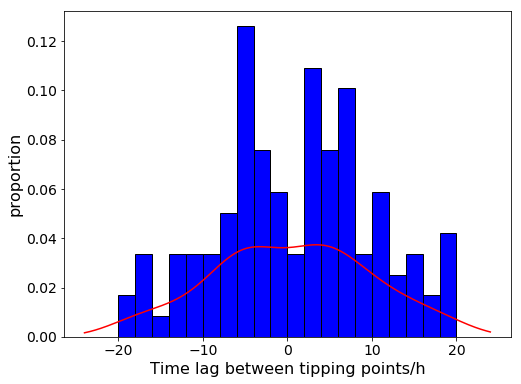

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 119

In [6]:
# plt.hist(non_reactive_mean_neighbor[:,0])
# plt.show()



# # print(mean_nei_vim_tip.shape)
# plt.hist(auto_corr_tip_point[:,0],bins=20)
# plt.show()
# plt.hist(auto_corr_tip_point[:,1],bins=20)
# plt.show()
# plt.hist(auto_corr_tip_point[:,2],bins=20)
# plt.show()
# plt.hist(auto_corr_tip_point[:,3],bins=20)
# plt.show()

# plt.scatter(auto_corr_tip_point[:,0],auto_corr_tip_point[:,1])
# plt.xlabel('morphology transition time',fontsize=16)
# plt.ylabel('vimentin transtion time',fontsize=16)
# plt.axis('equal')
# plt.show()



auto_corr_lag=auto_corr_tip_point[:,0]-auto_corr_tip_point[:,1]

weights = np.ones_like(auto_corr_lag)/float(len(auto_corr_lag))

plt.figure(figsize=(8,6))

plt.hist(auto_corr_lag/6,bins=20,weights=weights,color='blue',edgecolor='black')
plt.xlabel('Time lag between tipping points/h',fontsize=16)
plt.ylabel('proportion',fontsize=16)
# plt.show()
gkde=gaussian_kde(auto_corr_lag/6)#,bw_method=0.25)
x_eval=np.linspace(-24,24,300)
plt.plot(x_eval, gkde(x_eval), 'r-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'auto_corr_lag.png',dpi=300)
plt.show()

weights1= np.ones_like(auto_corr_lag[auto_corr_lag>0])/float(len(auto_corr_lag[auto_corr_lag>0]))
weights2= np.ones_like(auto_corr_lag[auto_corr_lag<0])/float(len(auto_corr_lag[auto_corr_lag<0]))

# ratio_bins=np.arange(0,0.45,step=0.05)
# len_bins=np.arange(0,450,step=50)

ratio_bins=np.arange(0,0.4,step=0.02)
len_bins=np.arange(0,400,step=20)


plt.figure(figsize=(8,6))

plt.hist([mean_nei_vim_tip[auto_corr_lag>0][:,0],mean_nei_morph_tip[auto_corr_lag<0][:,0]],\
         bins=ratio_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier']\
         ,color=['blue','red'],rwidth=1,edgecolor='black')

plt.xlabel('Average Ratio of Connected Boundary before tipping points',fontsize=14)
plt.ylabel('Proportion',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=14)
# plt.savefig(result_path+'neighbor_distribution.png',dpi=300)

plt.show()


plt.hist([mean_nei_vim_tip[auto_corr_lag>0][:,1],mean_nei_morph_tip[auto_corr_lag<0][:,1]],\
         bins=len_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier'],edgecolor='black')

plt.xlabel('Average Length of Connected Boundary before tipping points',fontsize=12)
plt.ylabel('Proportion',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.show()
# plt.hist(mean_nei_morph_tip[auto_corr_lag>0][:,0],bins=ratio_bins,weights=weights1,edgecolor='black')
# plt.title('Vimentin varies earlier',fontsize=16)
# plt.xlabel('Average Ratio of Connected Boundary before morphology tipping points',fontsize=12)
# plt.ylabel('Proportion',fontsize=16)
# plt.show()
# plt.hist(mean_nei_morph_tip[auto_corr_lag<0][:,0],bins=ratio_bins,weights=weights2,edgecolor='black')
# plt.title('Morphology varies earlier',fontsize=16)
# plt.xlabel('Average Ratio of Connected Boundary before morphology tipping points',fontsize=12)
# plt.ylabel('Proportion',fontsize=16)
# plt.show()


# plt.hist(mean_nei_vim_tip[auto_corr_lag>0][:,1],bins=len_bins,weights=weights1,edgecolor='black')
# plt.title('Vimentin varies earlier',fontsize=16)
# plt.xlabel('Average Length of Connected Boundary before vimentin tipping points',fontsize=12)
# plt.ylabel('Proportion',fontsize=16)
# plt.show()
# plt.hist(mean_nei_vim_tip[auto_corr_lag<0][:,1],bins=len_bins,weights=weights2,edgecolor='black')
# plt.title('Morphology varies earlier',fontsize=16)
# plt.xlabel('Average Length of Connected Boundary before vimentin tipping points',fontsize=12)
# plt.ylabel('Proportion',fontsize=16)
# plt.show()
# plt.hist(initial_vim[auto_corr_lag>0],weights=weights1)
# plt.show()
# plt.hist(initial_vim[auto_corr_lag<0],weights=weights2)
# plt.show()


# plt.hist(mean_neighbor[auto_corr_lag>0][:,0],bins=ratio_bins,weights=weights1,edgecolor='black')

# plt.title('Vimentin varies earlier',fontsize=16)
# plt.xlabel('Average Ratio of Connected Boundary',fontsize=16)
# plt.ylabel('Proportion',fontsize=16)
# # plt.axis([0,0.4,0,0.5])
# plt.show()
# plt.hist(mean_neighbor[auto_corr_lag<0][:,0],bins=ratio_bins,weights=weights2,edgecolor='black')

# plt.title('Morphology varies earlier',fontsize=16)
# plt.xlabel('Average Ratio of Connected Boundary',fontsize=16)
# plt.ylabel('Proportion',fontsize=16)
# # plt.axis([0,0.4,0,0.5])
# plt.show()

# plt.hist(mean_neighbor[auto_corr_lag>0][:,1],bins=len_bins,weights=weights1,edgecolor='black')

# plt.title('Vimentin varies earlier',fontsize=16)
# plt.xlabel('Average Length of Connected Boundary',fontsize=16)
# plt.ylabel('Proportion',fontsize=16)
# # plt.axis([0,350,0,0.5])
# # plt.savefig(result_path+'non-free_border_len_vim_first.tif',dpi=300)
# plt.show()
# plt.hist(mean_neighbor[auto_corr_lag<0][:,1],bins=len_bins,weights=weights2,edgecolor='black')
# plt.title('Morphology varies earlier',fontsize=16)
# plt.xlabel('Average Length of Connected Boundary',fontsize=16)
# plt.ylabel('Proportion',fontsize=16)
# # plt.axis([0,350,0,0.5])
# # plt.savefig(result_path+'non-free_border_len_morph_first.tif',dpi=300)
# plt.show()

plt.hist([mean_neighbor[auto_corr_lag>0][:,0],mean_neighbor[auto_corr_lag<0][:,0]],\
         bins=ratio_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier'],\
         edgecolor='black')

plt.xlabel('Average Ratio of Connected Boundary',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.show()

plt.hist([mean_neighbor[auto_corr_lag>0][:,1],mean_neighbor[auto_corr_lag<0][:,1]],\
         bins=len_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier'],edgecolor='black')

plt.xlabel('Average Length of Connected Boundary',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.show()

plt.hist([mean_nei_trans[auto_corr_lag>0][:,0],mean_nei_trans[auto_corr_lag<0][:,0]],\
         bins=ratio_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier'],\
         edgecolor='black')

plt.xlabel('Average Ratio of Connected Boundary before Transition',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.show()

plt.hist([mean_nei_trans[auto_corr_lag>0][:,1],mean_nei_trans[auto_corr_lag<0][:,1]],\
         bins=len_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier'],edgecolor='black')

plt.xlabel('Average Length of Connected Boundary before Transition',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.show()



## trans_t=np.amax(auto_corr_tip_point,axis=1)
# print(np.mean(trans_t[auto_corr_lag>0]),np.mean(trans_t[auto_corr_lag<0]))
# plt.hist(trans_t[auto_corr_lag>0],bins=10)
# # plt.axis([50,250,0,20])
# plt.show()
# plt.hist(trans_t[auto_corr_lag<0],bins=10)
# # plt.axis([50,250,0,20])
# plt.show()

plt.figure(figsize=(8,6))
plt.hist(trans_t/6.0,bins=20,weights = np.ones_like(trans_t)/float(len(trans_t)),color='blue',edgecolor='k')
plt.xlabel('First arrival time/h',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'First Arrival Time.png',dpi=300)
# plt.axis([50,250,0,20])
plt.show()

traj_cl_1=[]
traj_cl_1_proba=[]
traj_cl0=[]
traj_cl0_proba=[]
traj_cl1=[]
traj_cl1_proba=[]
for i in range(len(all_reaction_traj_fd)):
    
    X=all_reaction_traj[i]

    
    
    X1=all_reaction_proba[i]
    if auto_corr_lag[i]>0:
        traj_cl1.append(X)
        traj_cl1_proba.append(X1)
    if auto_corr_lag[i]==0:
        traj_cl0.append(X)
        traj_cl0_proba.append(X1)
    
    if auto_corr_lag[i]<=0:
        traj_cl_1.append(X)
        traj_cl_1_proba.append(X1)
print(len(traj_cl1))

In [14]:
# plt.hist(auto_corr_lag*1.0/trans_t,bins=50,weights=weights,color='blue',edgecolor='black')
# plt.show()

(145, 2)


<Figure size 576x432 with 0 Axes>

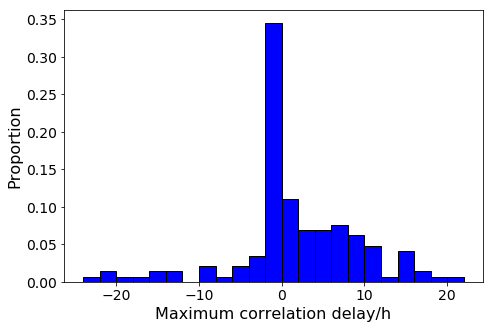

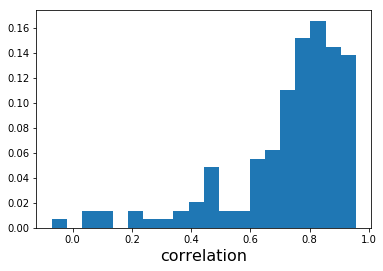

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 145

In [8]:

cross_corr_lag=np.array(cross_corr_lag)
print(cross_corr_lag.shape)
weights = np.ones_like(cross_corr_lag[:,0])/float(len(cross_corr_lag))
plt.figure(figsize=(7.5,5))
bins=np.arange(-24,24,2)
plt.hist(cross_corr_lag[:,0]/6,bins=bins,weights=weights,color='blue',edgecolor='black')
plt.xlabel('Maximum correlation delay/h',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'cross_corr_lag.png',dpi=300)
plt.show()
weights = np.ones_like(cross_corr_lag[:,1])/float(len(cross_corr_lag))
plt.hist(cross_corr_lag[:,1],bins=20,weights=weights)
plt.xlabel('correlation',fontsize=16)

plt.show()

ratio_bins=np.arange(0,0.4,step=0.05)
len_bins=np.arange(0,400,step=50)
weights1= np.ones_like(cross_corr_lag[cross_corr_lag[:,0]>0][:,0])/float(len(cross_corr_lag[cross_corr_lag[:,0]>0][:,0]))
weights2= np.ones_like(cross_corr_lag[cross_corr_lag[:,0]<0][:,0])/float(len(cross_corr_lag[cross_corr_lag[:,0]<0][:,0]))

plt.hist([mean_neighbor[cross_corr_lag[:,0]>0][:,0],mean_neighbor[cross_corr_lag[:,0]<0][:,0]],\
         bins=ratio_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier'],\
         edgecolor='black')

plt.xlabel('Average Ratio of Connected Boundary',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.show()

plt.hist([mean_neighbor[cross_corr_lag[:,0]>0][:,1],mean_neighbor[cross_corr_lag[:,0]<0][:,1]],\
         bins=len_bins,weights=[weights1,weights2],label=['Vimentin varies earlier', 'Morphology varies earlier'],edgecolor='black')

plt.xlabel('Average Length of Connected Boundary',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.show()

traj_cl_1=[]
traj_cl_1_proba=[]
traj_cl0=[]
traj_cl0_proba=[]
traj_cl1=[]
traj_cl1_proba=[]
for i in range(len(all_reaction_traj)):
    
    X=all_reaction_traj[i]
    
    
    X1=all_reaction_proba[i]
    if cross_corr_lag[i,0]>0:
        traj_cl1.append(X)
        traj_cl1_proba.append(X1)
    if cross_corr_lag[i,0]==0:
        traj_cl0.append(X)
        traj_cl0_proba.append(X1)
    
    if cross_corr_lag[i,0]<=0:
        traj_cl_1.append(X)
        traj_cl_1_proba.append(X1)
print(len(traj_cl1))

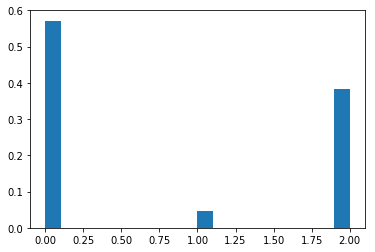

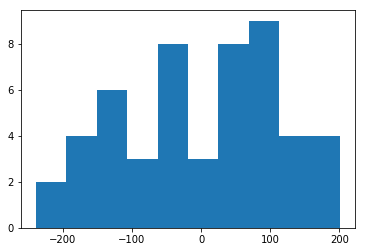

In [13]:
plt.hist(abs(np.sign(cross_corr_lag[:,0])-np.sign(auto_corr_lag)),bins=20,weights=weights)
plt.show()

mask=abs(np.sign(cross_corr_lag[:,0])-np.sign(auto_corr_lag))==2
plt.hist((cross_corr_lag[:,0]-auto_corr_lag)[mask],bins=10)
plt.show()

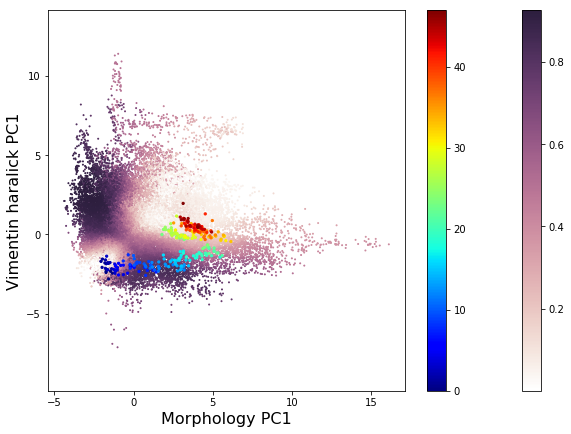

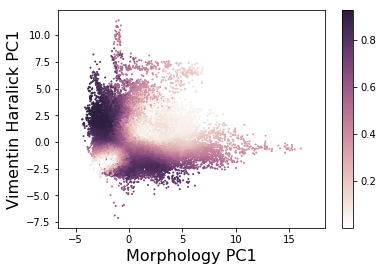

In [9]:
# for m in range(len(all_reaction_traj)):
#     x=all_reaction_traj[m]
#     x_state=ls.predict(x)
#     plt.scatter(x[:,0],x[:,1],c=x_state,cmap=plt.cm.Paired,s=0.01)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
f, ax = plt.subplots(figsize=(10,7))
points = ax.scatter(np.vstack(all_reaction_traj)[:,0], np.vstack(all_reaction_traj)[:,1], \
                    c=np.concatenate(all_reaction_proba)[:,1], s=1, cmap=cmap)
f.colorbar(points)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
plt.axis('equal')
# plt.savefig(result_path+'EM_kde.png',dpi=300)
# plt.show()

x=all_reaction_traj[2]
dot_color=np.arange(x.shape[0])/6
cm=plt.cm.get_cmap('jet')
plt.scatter(x[:,0],x[:,1],c=dot_color,cmap=cm,s=5)
plt.colorbar()  
# plt.axis([-2,5,-3.5,5])
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.savefig(result_path+'all_scatter.tif',dpi=300)
plt.show()

f, ax = plt.subplots()
points = ax.scatter(np.vstack(all_reaction_traj)[:,0], np.vstack(all_reaction_traj)[:,1], \
                    c=np.concatenate(all_reaction_proba)[:,1], s=1, cmap=cmap)
f.colorbar(points)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
plt.axis('equal')
plt.show()

In [10]:
for m in range(len(traj_cl1)):
    x=traj_cl1[m]
    plt.scatter(x[:,0],x[:,1],s=0.01,color='b')
plt.axis([-5,10,-5,5])
plt.show()
for m in range(len(traj_cl_1)):
    x=traj_cl_1[m]
    plt.scatter(x[:,0],x[:,1],s=0.01,color='r')
plt.axis([-5,10,-5,5])
plt.show()

sns.kdeplot(np.vstack(traj_cl1)[:,0],np.vstack(traj_cl1)[:,1])
plt.show()
sns.kdeplot(np.vstack(traj_cl_1)[:,0],np.vstack(traj_cl_1)[:,1])
plt.show()

NameError: name 'traj_cl1' is not defined

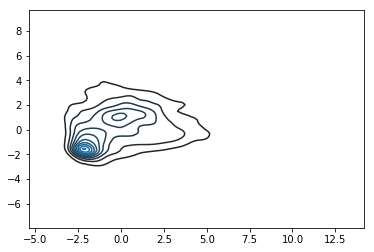

In [12]:
sns.kdeplot(np.vstack(all_reaction_traj)[:,0],np.vstack(all_reaction_traj)[:,1])
plt.show()

In [185]:
# plt.scatter(np.vstack(traj_cl0)[:,0],np.vstack(traj_cl0)[:,1],s=0.1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()
# sns.kdeplot(np.vstack(traj_cl0)[:,0],np.vstack(traj_cl0)[:,1],n_levels=20,shade=True)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()

# for m in range(len(traj_cl1)):
#     x=traj_cl1[m]
#     x_state=ls.predict(x)
#     plt.scatter(x[:,0],x[:,1],c=x_state,cmap=plt.cm.Paired,s=0.1)


# x=traj_cl1[0]
# dot_color=np.arange(x.shape[0])
# cm=plt.cm.get_cmap('jet')
# plt.scatter(x[:,0],x[:,1],c=dot_color,cmap=cm,s=5)
# plt.colorbar()  
# # plt.axis([-2,5,-3.5,5])
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# # plt.savefig(result_path+'ccr_vim_first.tif',dpi=300)
# plt.show()

# plt.scatter(np.vstack(traj_cl1)[:,0],np.vstack(traj_cl1)[:,1],s=0.1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.savefig(result_path+'ccr_vim_first.tif',dpi=300)
# plt.show()

# sns.kdeplot(np.vstack(traj_cl1)[:,0],np.vstack(traj_cl1)[:,1],n_levels=20,shade=True)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()

In [186]:
# for m in range(len(traj_cl_1)):
#     x=traj_cl_1[m]
#     x_state=ls.predict(x)
#     plt.scatter(x[:,0],x[:,1],c=x_state,cmap=plt.cm.Paired,s=0.1)


# x=traj_cl_1[0]
# dot_color=np.arange(x.shape[0])
# cm=plt.cm.get_cmap('jet')
# plt.scatter(x[:,0],x[:,1],c=dot_color,cmap=cm,s=5)
# plt.colorbar()  
# # plt.axis([-2,5,-3.5,5])
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# # plt.savefig(result_path+'ccr_morph_first.tif',dpi=300)
# plt.show()
# plt.scatter(np.vstack(traj_cl_1)[:,0],np.vstack(traj_cl_1)[:,1],s=0.1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.savefig(result_path+'ccr_morph_first.tif',dpi=300)
# plt.show()
# sns.kdeplot(np.vstack(traj_cl_1)[:,0],np.vstack(traj_cl_1)[:,1],n_levels=20,shade=True)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()

2


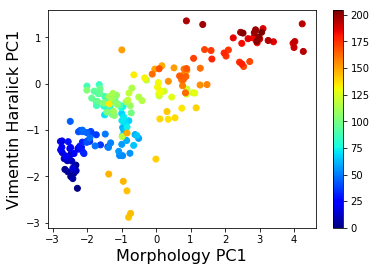

In [15]:
x0=to_time_series_dataset(traj_cl0)
print(len(x0))
# x0_dba=dtw_barycenter_averaging(x0,max_iter=20)
# x0_dba=softdtw_barycenter(x0,gamma=1,max_iter=100)
x0_dba=euclidean_barycenter(x0)
# km = TimeSeriesKMeans(n_clusters=1, metric="softdtw",verbose=True).fit(x0)
# x0_dba=km.cluster_centers_[0]

dot_c=np.arange(x0_dba.shape[0])
cm=plt.cm.get_cmap('jet')
plt.scatter(x0_dba[:,0].ravel(),x0_dba[:,1].ravel(), c=dot_c,cmap=cm)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis([-2,2.5,-2,3])
plt.colorbar()
# plt.savefig(result_path+'tp_vim_early_mean.png')
plt.show()

# # ax = plt.axes(projection='3d')
# # ax.scatter3D(x0_dba[:,0].ravel(),x0_dba[:,1].ravel(),x0_dba[:,2].ravel(),c=dot_c,cmap=cm)
# # plt.show()

71
1053046672.262 --> 1190138931.761 --> 1190153119.409 --> 1190151824.028 --> 1190151765.068 --> 1190151716.760 --> 1190151712.012 --> 1190151711.200 --> 1190151711.200 --> 
181


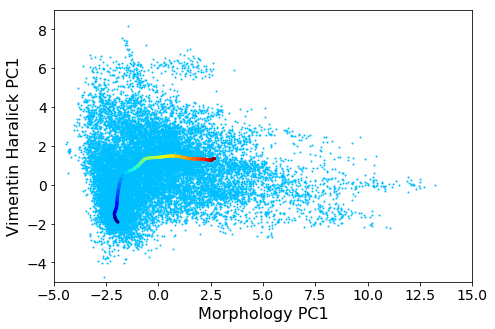

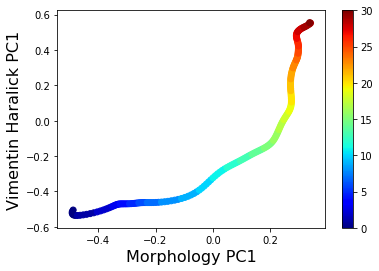

In [62]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
f, ax = plt.subplots(figsize=(7.5,5))
# points = ax.scatter(np.vstack(traj_cl1)[:,0], np.vstack(traj_cl1)[:,1], \
#                     c=np.concatenate(traj_cl1_proba)[:,1], s=1, cmap=cmap)
# f.colorbar(points)
ax.scatter(np.vstack(traj_cl1)[:,0], np.vstack(traj_cl1)[:,1],s=1,color='deepskyblue')
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis('equal')




x1=to_time_series_dataset(traj_cl1)
print(len(x1))
#x1_dba=dtw_barycenter_averaging(x1,max_iter=20)
# x1_dba=softdtw_barycenter(x1,gamma=5)
# x1_dba=euclidean_barycenter(x1)
km = TimeSeriesKMeans(n_clusters=1, metric="softdtw",metric_params={"gamma_sdtw": 100},verbose=True).fit(x1)
# ks= KShape(n_clusters=1, verbose=True).fit(x1)
x1_dba=km.cluster_centers_[0]

print(x1_dba.shape[0])
dot_c=np.arange(x1_dba.shape[0])/6
cm=plt.cm.get_cmap('jet')
plt.scatter(x1_dba[:,0].ravel(),x1_dba[:,1].ravel(), c=dot_c,cmap=cm,s=5)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
plt.axis([-5,15,-5,9])
# cbar=plt.colorbar(ticks=np.arange(0,x1_dba.shape[0]//6,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'ccr_vim_early_mean.png',dpi=300)
plt.show()

plt.scatter(x1_dba[:,2].ravel(),x1_dba[:,3].ravel(), c=dot_c,cmap=cm)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis([-2,2.5,-2,3])
plt.colorbar()
# plt.savefig(result_path+'ccr_vim_early_mean.tif',dpi=300)
plt.show()
# ax = plt.axes(projection='3d')
# ax.scatter3D(x1_dba[:,0].ravel(),x1_dba[:,1].ravel(),x1_dba[:,2].ravel(),c=dot_c,cmap=cm)
# plt.show()

68
1039131384.195 --> 1153362917.234 --> 1153364843.605 --> 1153365176.000 --> 1153365180.402 --> 1153365184.689 --> 1153365184.689 --> 


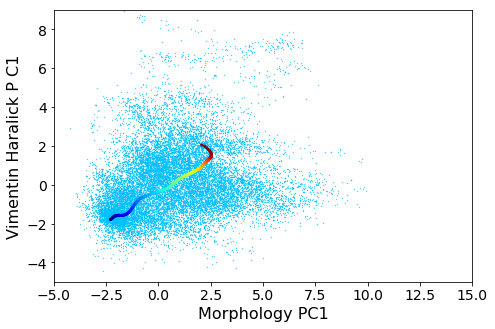

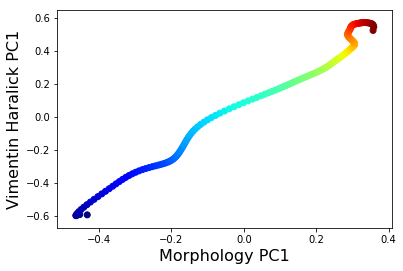

In [63]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
f, ax = plt.subplots(figsize=(7.5,5))
# points = ax.scatter(np.vstack(traj_cl_1)[:,0], np.vstack(traj_cl_1)[:,1], \
#                     c=np.concatenate(traj_cl_1_proba)[:,1], s=1, cmap=cmap)
# f.colorbar(points)
ax.scatter(np.vstack(traj_cl_1)[:,0], np.vstack(traj_cl_1)[:,1],s=0.1,color='deepskyblue')
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis('equal')


x_1=to_time_series_dataset(traj_cl_1)
print(len(x_1))
# x_1_dba=dtw_barycenter_averaging(x_1,max_iter=20)
# x_1_dba=softdtw_barycenter(x_1,gamma=1,max_iter=100)
# x_1_dba=euclidean_barycenter(x_1)
km = TimeSeriesKMeans(n_clusters=1, metric="softdtw",metric_params={"gamma_sdtw": 100},verbose=True).fit(x_1)
# # ks= KShape(n_clusters=1, verbose=True).fit(x_1)
x_1_dba=km.cluster_centers_[0]


dot_c=np.arange(x_1_dba.shape[0])
cm=plt.cm.get_cmap('jet')
plt.scatter(x_1_dba[:,0].ravel(),x_1_dba[:,1].ravel(), c=dot_c,cmap=cm,s=5)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick P C1',fontsize=16)
plt.axis([-5,15,-5,9])
# plt.colorbar()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'ccr_morph_early_mean.png',dpi=300)
plt.show()
plt.scatter(x_1_dba[:,2].ravel(),x_1_dba[:,3].ravel(), c=dot_c,cmap=cm)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis([-2,2.5,-2,3])
# plt.colorbar()
# plt.savefig(result_path+'ccr_morph_early_mean.tif',dpi=300)
plt.show()
# ax = plt.axes(projection='3d')
# ax.scatter3D(x_1_dba[:,0].ravel(),x_1_dba[:,1].ravel(),x_1_dba[:,2].ravel(),c=dot_c,cmap=cm)
# plt.show()

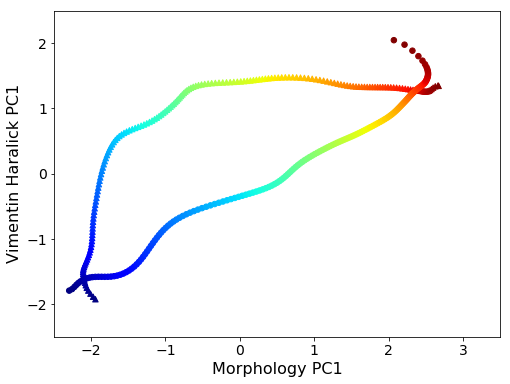

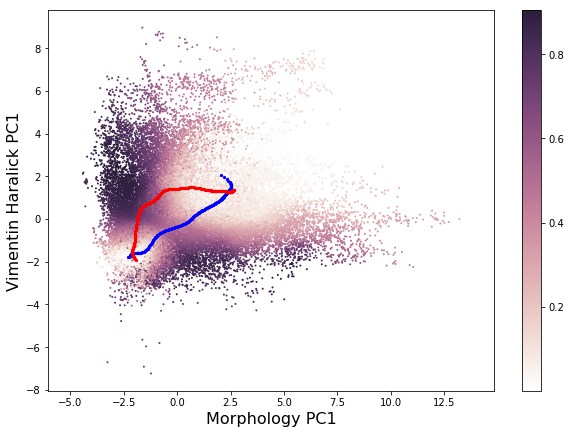

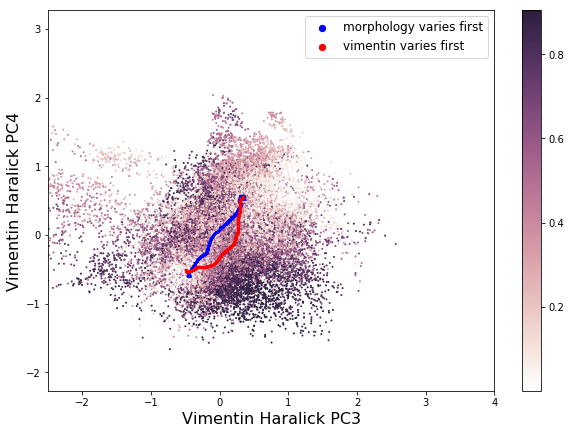

In [68]:
dot_c1=np.arange(x1_dba.shape[0])
dot_c2=np.arange(x_1_dba.shape[0])
cm1=plt.cm.get_cmap('jet')

plt.figure(figsize=(8,6))
plt.scatter(x1_dba[:,0],x1_dba[:,1],c=dot_c1,cmap=cm1,marker='^',s=30,label='vimentin varies first')
plt.scatter(x_1_dba[:,0],x_1_dba[:,1],c=dot_c2,cmap=cm1,s=30,label='morphology varies first')

# cm2=plt.cm.get_cmap('cool')
# plt.scatter(x_1_dba[:,0],x_1_dba[:,1],c=dot_c,cmap=cm1,s=5)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# lgnd=plt.legend(['morphology varies first','vimentin varies first'],fontsize=12)
# lgnd=plt.legend(fontsize=14)
# lgnd.legendHandles[0]._sizes = [60]
# lgnd.legendHandles[1]._sizes = [60]
plt.axis([-2.5,3.5,-2.5,2.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'ccr_mean_path.png',dpi=300)
plt.show()



cmap = sns.cubehelix_palette(light=1, as_cmap=True)
f, ax = plt.subplots(figsize=(10,7))
points = ax.scatter(np.vstack(all_reaction_traj)[:,0], np.vstack(all_reaction_traj)[:,1], \
                    c=np.concatenate(all_reaction_proba)[:,1], s=1, cmap=cmap)
f.colorbar(points)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis('equal')

# print(x_1_dba.shape[0],x1_dba.shape[0])
# dot_c=np.arange(max(x1_dba.shape[0],x_1_dba.shape[0]))
# cm1=plt.cm.get_cmap('jet')
# plt.scatter(x1_dba[:,0],x1_dba[:,1],marker='^',c=dot_c,cmap=cm1,s=5)

plt.scatter(x_1_dba[:,0],x_1_dba[:,1],c='b',s=5,label='morphology varies first')

plt.scatter(x1_dba[:,0],x1_dba[:,1],c='r',s=5,label='vimentin varies first')

# cm2=plt.cm.get_cmap('cool')
# plt.scatter(x_1_dba[:,0],x_1_dba[:,1],c=dot_c,cmap=cm1,s=5)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# lgnd=plt.legend(['morphology varies first','vimentin varies first'],fontsize=12)
# lgnd=plt.legend(fontsize=12)
# lgnd.legendHandles[0]._sizes = [40]
# lgnd.legendHandles[1]._sizes = [40]
plt.axis('equal')
# plt.colorbar()

# plt.savefig(result_path+'ccr_path_compare.tif',dpi=300)
plt.show()

f, ax = plt.subplots(figsize=(10,7))
points = ax.scatter(np.vstack(all_reaction_traj)[:,2], np.vstack(all_reaction_traj)[:,3], \
                    c=np.concatenate(all_reaction_proba)[:,1], s=1, cmap=cmap)
f.colorbar(points)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
plt.axis('equal')


plt.scatter(x_1_dba[:,2],x_1_dba[:,3],c='b',s=5,label='morphology varies first')

plt.scatter(x1_dba[:,2],x1_dba[:,3],c='r',s=5,label='vimentin varies first')

# cm2=plt.cm.get_cmap('cool')
# plt.scatter(x_1_dba[:,0],x_1_dba[:,1],c=dot_c,cmap=cm1,s=5)
plt.xlabel('Vimentin Haralick PC3',fontsize=16)
plt.ylabel('Vimentin Haralick PC4',fontsize=16)
# lgnd=plt.legend(['morphology varies first','vimentin varies first'],fontsize=12)
lgnd=plt.legend(fontsize=12)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
plt.axis('equal')
plt.axis([-2.5,4,-2,3])
# plt.colorbar()

# plt.savefig(result_path+'ccr_path_compare.tif',dpi=300)
plt.show()

# ax = plt.axes(projection='3d')
# ax.scatter3D(x0_dba[:,0].ravel(),x0_dba[:,1].ravel(),x0_dba[:,2].ravel(),c='r')
# ax.scatter3D(x1_dba[:,0].ravel(),x1_dba[:,1].ravel(),x1_dba[:,2].ravel(),c='b')
# plt.show()

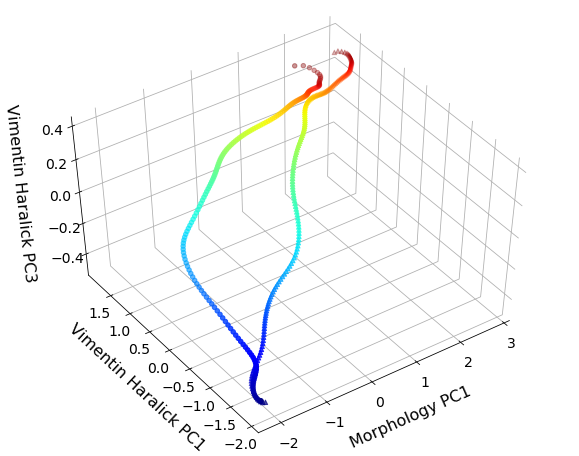

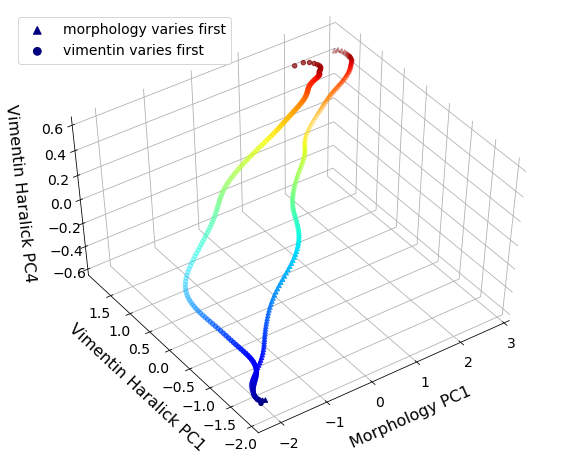

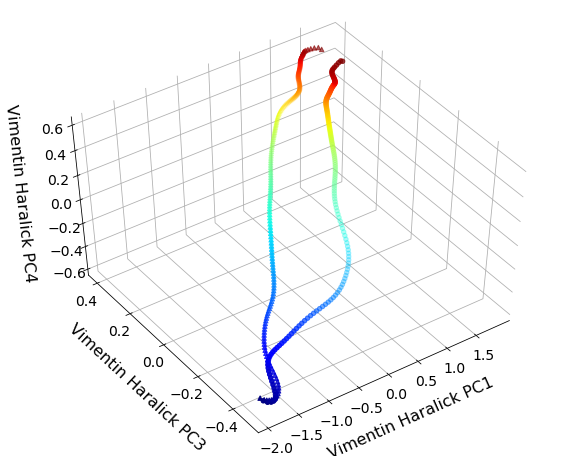

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=235, elev=50)

dot_c1=np.arange(x_1_dba.shape[0])
dot_c2=np.arange(x1_dba.shape[0])
cm1=plt.cm.get_cmap('jet')
ax.scatter3D(x_1_dba[:,0],x_1_dba[:,1],x_1_dba[:,2],marker='^',s=20,c=dot_c1,cmap=cm1)

ax.scatter3D(x1_dba[:,0],x1_dba[:,1],x1_dba[:,2],marker='o',s=20,c=dot_c2,cmap=cm1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(14)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('Morphology PC1',fontsize=16,labelpad=15)
ax.set_ylabel('Vimentin Haralick PC1',fontsize=16,labelpad=15)
ax.set_zlabel('Vimentin Haralick PC3',fontsize=16,labelpad=15)
# lgnd=plt.legend(['morphology varies first','vimentin varies first'],fontsize=14)
# lgnd.legendHandles[0]._sizes = [60]
# lgnd.legendHandles[1]._sizes = [60]
# fig.colorbar(s3d,shrink=0.5,aspect=20)
plt.savefig(result_path+'mean_path_pc113.png',dpi=300)

plt.show()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=235, elev=50)


ax.scatter3D(x_1_dba[:,0],x_1_dba[:,1],x_1_dba[:,3],marker='^',s=20,c=dot_c1,cmap=cm1)
ax.scatter3D(x1_dba[:,0],x1_dba[:,1],x1_dba[:,3],marker='o',s=20,c=dot_c2,cmap=cm1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(14)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('Morphology PC1',fontsize=16,labelpad=15)
ax.set_ylabel('Vimentin Haralick PC1',fontsize=16,labelpad=15)
ax.set_zlabel('Vimentin Haralick PC4',fontsize=16,labelpad=15)
lgnd=plt.legend(['morphology varies first','vimentin varies first'],fontsize=14)
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
# fig.colorbar(s3d,shrink=0.5,aspect=20)
plt.show()




fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=235, elev=50)

dot_c=np.arange(max(x1_dba.shape[0],x_1_dba.shape[0]))
cm1=plt.cm.get_cmap('jet')
ax.scatter3D(x_1_dba[:,1],x_1_dba[:,2],x_1_dba[:,3],marker='^',s=20,c=dot_c1,cmap=cm1)
ax.scatter3D(x1_dba[:,1],x1_dba[:,2],x1_dba[:,3],marker='o',s=20,c=dot_c2,cmap=cm1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(14)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('Vimentin Haralick PC1',fontsize=16,labelpad=15)
ax.set_ylabel('Vimentin Haralick PC3',fontsize=16,labelpad=15)
ax.set_zlabel('Vimentin Haralick PC4',fontsize=16,labelpad=15)
# lgnd=plt.legend(['morphology varies first','vimentin varies first'],fontsize=12)
# lgnd.legendHandles[0]._sizes = [60]
# lgnd.legendHandles[1]._sizes = [60]
# fig.colorbar(s3d,shrink=0.5,aspect=20)
plt.savefig(result_path+'mean_path_pc134.png',dpi=300)

plt.show()

In [43]:
# from tslearn.metrics import sigma_gak, cdist_gak
# X=to_time_series_dataset(all_reaction_traj)
# km = TimeSeriesKMeans(n_clusters=3, metric="softdtw",verbose=True).fit(X)
#ks = KShape(n_clusters=3, verbose=True).fit(X)
# y_pred=GlobalAlignmentKernelKMeans(n_clusters=3, sigma=sigma_gak(X), n_init=20, verbose=True).fit_predict(X)

In [45]:

# for i in range(len(km.cluster_centers_)):
#     x0_dba=km.cluster_centers_[i]
#     dot_c=np.arange(x0_dba.shape[0])
#     cm=plt.cm.get_cmap('jet')
#     plt.scatter(x0_dba[:,0].ravel(),x0_dba[:,1].ravel(), c=dot_c,cmap=cm)
#     plt.xlabel('Morphology PC1',fontsize=16)
#     plt.ylabel('Vimentin Haralick PC1',fontsize=16)
#     # plt.axis([-2,2.5,-2,3])
#     plt.colorbar()
#     # plt.savefig(result_path+'tp_vim_early_mean.png')
#     plt.show()
#y_pred =km.predict(X)
# for yi in range(3):
#     for xx in X[y_pred == yi]:
#         plt.scatter(xx[:,0].ravel(), xx[:,1].ravel(),s=0.1)

#     plt.show()